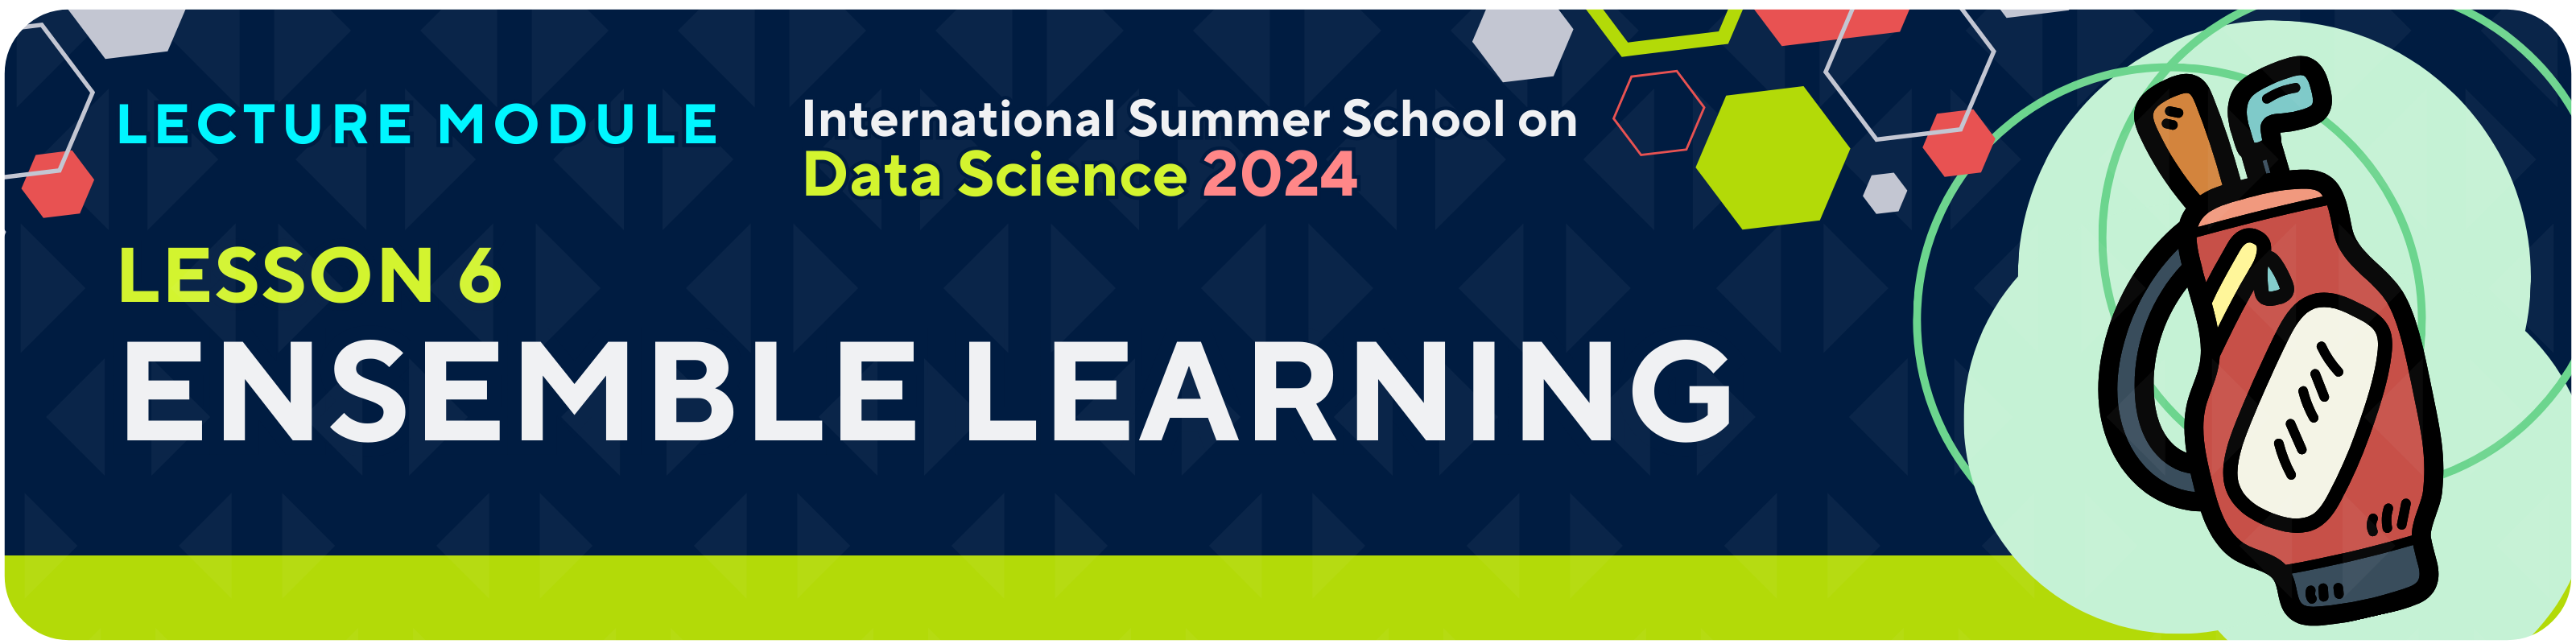

<div class='markdown-google-sans'>

## **06.0**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Intro To Ensemble Learning**
</div>
<img src="https://i.imgur.com/MBnzpCm.png" width=750 />

<img src="https://i.imgur.com/UpHNktf.png" width=750 />


<div class='markdown-google-sans'>

## **06.1**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Voting**
</div>

<div class='markdown-google-sans'>

### **About Voting**
</div>
<img src="https://i.imgur.com/GYdwejR.png" width=750 />


<div class='markdown-google-sans'>

### **Main Mechanism**
</div>
<img src="https://i.imgur.com/mxnauWw.png" width=750 />


<div class='markdown-google-sans'>

### **Algorithm Steps**
</div>

<div class='markdown-google-sans'>

#### **📊　Dataset & Libraries Used**
</div>

<img src="https://i.imgur.com/2YjJmVV.png" width=750 />



In [ ]:
# Importing Necessary Libraries
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error

import numpy as np
np.set_printoptions(edgeitems=30, formatter={'float_kind': '{:.2f}'.format})

import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.width = 0

# Read Data
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Reorder the DataFrame
df = df[['sunny','overcast','rain','Temperature','Humidity','Wind','Play', 'Num_Players']]

# Set feature matrix X and target vector y for both classification
X, y_clf = df.drop(['Play','Num_Players'], axis=1).values, df['Play']
X_train, X_test, y_clf_train, y_clf_test = train_test_split(X, y_clf, train_size=0.5, shuffle=False)

# Set feature matrix X and target vector y for regression
X, y_reg = df.drop(['Play','Num_Players'], axis=1), df['Num_Players']
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, train_size=0.5, shuffle=False)

# Apply scaling to numerical columns
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

print(pd.concat([X_train, y_clf_train, y_reg_train], axis=1), '\n')
print(pd.concat([X_test, y_clf_test, y_reg_test], axis=1))

    sunny  overcast  rain  Temperature  Humidity  Wind  Play  Num_Players
0       1         0     0         1.80      0.50     0     0           52
1       1         0     0         1.02      1.02     1     0           39
2       0         1     0         1.49     -0.24     0     1           43
3       0         0     1        -0.56      1.66     0     1           37
4       0         0     1        -0.88     -0.03     0     1           28
5       0         0     1        -1.35     -1.08     1     0           19
6       0         1     0        -1.51     -1.61     1     1           43
7       1         0     0        -0.25      1.55     0     0           47
8       1         0     0        -0.72     -1.08     0     1           56
9       0         0     1         0.23     -0.03     0     1           33
10      1         0     0         0.23     -1.08     1     1           49
11      0         1     0        -0.25      1.02     1     1           23
12      0         1     0         1.17

<div class='markdown-google-sans'>

#### **Preparation Phase**
</div>
<img src="https://i.imgur.com/wjZW2m8.png" width=750 />


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Create the individual models
knn_clf = KNeighborsClassifier(n_neighbors=3)
dt_clf = DecisionTreeClassifier(max_depth=1)
lr_clf = LogisticRegression(penalty=None)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Create the individual models
knn_reg = KNeighborsRegressor(n_neighbors=4)
dt_reg = DecisionTreeRegressor()
lr_reg = LinearRegression()

<div class='markdown-google-sans'>

#### **Training Phase**
</div>
<img src="https://i.imgur.com/uqJXzDm.png" width=750 />


In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a voting classifier
voting_clf = VotingClassifier(
    estimators=[('kNN', knn_clf),
                ('DecisionTree', dt_clf),
                ('LogRegression', lr_clf)]
    )

# Fit the classifier to the training data
voting_clf.fit(X_train, y_clf_train)

VotingClassifier(estimators=[('kNN', KNeighborsClassifier(n_neighbors=3)),
                             ('DecisionTree',
                              DecisionTreeClassifier(max_depth=1)),
                             ('LogRegression',
                              LogisticRegression(penalty=None))])

In [ ]:
from sklearn.ensemble import VotingRegressor

# Create a voting regressor
voting_reg = VotingRegressor(
    estimators=[('kNN', knn_reg),
                ('DecisionTree', dt_reg),
                ('LinRegression', lr_reg)]
    )

# Fit the regressor to the training data
voting_reg.fit(X_train, y_reg_train)

VotingRegressor(estimators=[('kNN', KNeighborsRegressor(n_neighbors=4)),
                            ('DecisionTree', DecisionTreeRegressor()),
                            ('LinRegression', LinearRegression())])

<div class='markdown-google-sans'>

#### **Prediction Phase**
</div>

<img src="https://i.imgur.com/Mu1uzXk.png" width=750 />


<img src="https://i.imgur.com/qw3RWkm.png" width=750 />



In [ ]:
for i, est in voting_clf.named_estimators_.items():
    y_base_pred = est.predict(X_test)
    print(f"Estimator {i:13} Pred: {y_base_pred}")

y_clf_pred = voting_clf.predict(X_test)
print(f"      Voting Classifier Pred: {y_clf_pred.round(4)}")

Estimator kNN           Pred: [0 1 1 1 0 1 1 1 1 1 1 1 1 1]
Estimator DecisionTree  Pred: [0 1 0 0 0 0 1 0 0 1 0 1 0 1]
Estimator LogRegression Pred: [0 1 1 0 0 0 1 1 0 1 1 1 1 1]
      Voting Classifier Pred: [0 1 1 0 0 0 1 1 0 1 1 1 1 1]


In [ ]:
for i, est in voting_reg.named_estimators_.items():
    y_base_pred = est.predict(X_test)
    print(f"Estimator {i:13} Pred: {y_base_pred}")

y_reg_pred = voting_reg.predict(X_test)
print(f"       Voting Regressor Pred: {y_reg_pred}")

Estimator kNN           Pred: [40.25 35.00 27.75 46.50 45.25 25.25 44.00 27.75 46.50 41.75 47.50 38.00
 29.00 42.50]
Estimator DecisionTree  Pred: [39.00 23.00 33.00 49.00 39.00 19.00 23.00 33.00 49.00 42.00 52.00 23.00
 28.00 43.00]
Estimator LinRegression Pred: [37.89 40.16 29.20 42.30 50.01 15.74 26.91 28.81 43.61 46.26 60.13 24.75
 35.41 42.67]
       Voting Regressor Pred: [39.05 32.72 29.98 45.93 44.75 20.00 31.30 29.85 46.37 43.34 53.21 28.58
 30.80 42.72]


<div class='markdown-google-sans'>

#### **Evaluation Phase**
</div>

<img src="https://i.imgur.com/cu18m3X.png" width=750 />




In [ ]:
for i, est in voting_clf.named_estimators_.items():
    y_base_pred = est.predict(X_test)
    base_accuracy = accuracy_score(y_clf_test, y_base_pred)
    print(f"Estimator {i:13} Accuracy: {base_accuracy.round(4)}")

voting_accuracy = accuracy_score(y_clf_test, y_clf_pred)
print(f"      Voting Classifier Accuracy: {voting_accuracy.round(4)}")

Estimator kNN           Accuracy: 0.7857
Estimator DecisionTree  Accuracy: 0.7143
Estimator LogRegression Accuracy: 0.8571
      Voting Classifier Accuracy: 0.8571


In [ ]:
for i, est in voting_reg.named_estimators_.items():
    y_base_pred = est.predict(X_test)
    base_rmse = mean_squared_error(y_reg_test, y_base_pred, squared=False)
    print(f"Estimator {i:13} RMSE: {base_rmse.round(4)}")

voting_rmse = mean_squared_error(y_reg_test, y_reg_pred, squared=False)
print(f"       Voting Regressor RMSE: {voting_rmse.round(4)}")

Estimator kNN           RMSE: 7.6503
Estimator DecisionTree  RMSE: 5.3452
Estimator LinRegression RMSE: 7.026
       Voting Regressor RMSE: 5.0383


<div class='markdown-google-sans'>

### **Pros and Cons**
</div>
<img src="https://i.imgur.com/YTW0hAn.png" width=750 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Voting Classifier Simplified**
</div>

In [ ]:
# IMPORT LIBRARIES ── Import necessary libraries for model training and evaluation.
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import accuracy_score

from sklearn.linear_model    import LogisticRegression
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.ensemble        import VotingClassifier
from sklearn.tree            import DecisionTreeClassifier

# LOAD DATASET ── Load the dataset from the provided URL and drop the target column 'Num_Players'.
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url).drop('Num_Players', axis=1)

# SET TARGET COLUMN ── Define the target column for classification.
target_col = 'Play'

# SPLIT DATA ── Divide the dataset into 50% training and 50% testing sets without shuffling.
X, y_clf = df.drop(target_col, axis=1), df[target_col]
X_train, X_test, y_clf_train, y_clf_test = train_test_split(X, y_clf, train_size=0.5, shuffle=False)

# SCALE DATA ── Apply standard scaling to numerical columns to normalize data after splitting.
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# DEFINE & FIT MODEL ── Initialize and train the Voting Classifier model with specified estimators.
voting_clf = VotingClassifier(estimators=[
                                ('knn', KNeighborsClassifier(n_neighbors=3)),
                                ('dt', DecisionTreeClassifier(max_depth=3, random_state=42)),
                                ('lr', LogisticRegression(C=0.1, random_state=42))
                              ])
voting_clf.fit(X_train, y_clf_train)

# PREDICT ── Make predictions using the trained model on the test data.
y_clf_pred = voting_clf.predict(X_test)

# EVALUATE ── Calculate and display the accuracy of the model.
print(f"Accuracy: {accuracy_score(y_clf_test, y_clf_pred)}")

Accuracy: 0.7857142857142857


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Voting Regressor Simplified**
</div>

In [ ]:
# IMPORT LIBRARIES ── Import necessary libraries for Voting regressor and preprocessing.
import pandas as pd
import numpy  as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.neighbors    import KNeighborsRegressor
from sklearn.ensemble     import VotingRegressor
from sklearn.tree         import DecisionTreeRegressor

# LOAD DATASET ── Load the dataset from the provided URL and drop the target column 'Play'.
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url).drop('Play', axis=1)

# SET TARGET COLUMN ── Define the target column for regression.
target_col = 'Num_Players'

# SPLIT DATA ── Divide the dataset into 50% training and 50% testing sets without shuffling.
X, y_reg = df.drop(target_col, axis=1), df[target_col]
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, train_size=0.5, shuffle=False)

# SCALE DATA ── Apply standard scaling to numerical columns to normalize data after splitting.
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# DEFINE & FIT MODEL ── Initialize and train the Voting Regressor model with specified estimators.
voting_reg = VotingRegressor(estimators=[
                                ('knn', KNeighborsRegressor(n_neighbors=4)),
                                ('dt', DecisionTreeRegressor(max_depth=4, random_state=42)),
                                ('lr', LinearRegression())
                              ])
voting_reg.fit(X_train, y_reg_train)

# PREDICT ── Make predictions using the trained model on the test data.
y_reg_pred = voting_reg.predict(X_test)

# EVALUATE ── Calculate and display the Root Mean Squared Error (RMSE) of the model.
print(f"RMSE: {mean_squared_error(y_reg_test, y_reg_pred, squared=False)}")

RMSE: 4.904078420580533


<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 06-1**
</div>

Using the following dataset, perform Voting Classifier with the following 5 estimators:
- `KNeighborsClassifier()`
- `DecisionTreeClassifier()`
- `LogisticRegression()`
- `BernoulliNB()`
- `SVC()`

Print the Accuracy.

In [ ]:
# Answer

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes  import BernoulliNB
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.ensemble     import VotingClassifier
from sklearn.tree         import DecisionTreeClassifier
from sklearn.svm          import SVC

practice_dataset_url = "https://www.dropbox.com/scl/fi/p0n2vdwbve761sfoxrgf3/golf_dataset_mini_with_testset_practice.csv?rlkey=1r1mw6w9fhtxwijejbns1yknt&dl=0&raw=1"
practice_df = pd.read_csv(practice_dataset_url)
df = practice_df.copy()
# target_col = 'Play'

#....................

# SET TARGET COLUMN ── Define the target column for regression.
target_col = 'Play'

# SPLIT DATA ── Divide the dataset into 50% training and 50% testing sets without shuffling.
X, y_reg = df.drop(target_col, axis=1), df[target_col]
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, train_size=0.5, shuffle=False)

# SCALE DATA ── Apply standard scaling to numerical columns to normalize data after splitting.
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# DEFINE & FIT MODEL ── Initialize and train the Voting Regressor model with specified estimators.
voting_reg = VotingRegressor(estimators=[
                                ('knn', KNeighborsRegressor(n_neighbors=4)),
                                ('dt', DecisionTreeRegressor(max_depth=4, random_state=42)),
                                ('lr', LogisticRegression()),
                                ('br',BernoulliNB()),
                                ('svc', SVC())
                              ])

#Remaining......
voting_reg.fit(X_train, y_reg_train)

# PREDICT ── Make predictions using the trained model on the test data.
y_reg_pred = voting_reg.predict(X_test)

# EVALUATE ── Calculate and display the Root Mean Squared Error (RMSE) of the model.
print(f"RMSE: {mean_squared_error(y_reg_test, y_reg_pred, squared=False)}")



ValueError: The estimator LogisticRegression should be a regressor.

In [ ]:
practice_df.head()


,DaytimeDuration,SunshineDuration,Temperature,Humidity,RainfallAmount,LightningStrikes,Outlook_Overcast,Outlook_Rainy,Outlook_Snowy,Outlook_Sunny,Play
0,12.56,11.10,34.58,27.68,76.25,10,0,0,1,0,1
1,10.10,8.72,20.60,63.92,53.94,10,1,0,0,0,0
2,11.10,8.27,17.28,75.45,77.86,5,1,0,0,0,0
3,10.89,10.73,22.38,49.55,53.04,7,0,0,1,0,1
4,12.95,8.01,28.71,24.45,0.06,8,1,0,0,0,1


<div class='markdown-google-sans'>

## **06.2**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Bagging**
</div>

<div class='markdown-google-sans'>

### **About Bagging**
</div>
<img src="https://i.imgur.com/VGHxnIU.png" width=750 />

<img src="https://i.imgur.com/AB8AsMY.png" width=750 />


In [ ]:
from sklearn.utils import resample

# Let's create a synthetic dataset for demonstration
data = np.array([1, 2, 3, 4, 5])

# Number of bootstrap samples to create
n_bootstrap_samples = 3

# Create multiple bootstrap samples
bootstrap_samples = [resample(data, replace=True, n_samples=len(data), random_state=i)
                     for i in range(n_bootstrap_samples)]

# Sort each bootstrap sample for display purposes
sorted_bootstrap_samples = [np.sort(sample) for sample in bootstrap_samples]

sorted_bootstrap_samples

[array([1, 4, 4, 4, 5]), array([1, 2, 4, 4, 5]), array([1, 1, 3, 4, 4])]

<div class='markdown-google-sans'>

### **Main Mechanism**
</div>
<img src="https://i.imgur.com/IMMP33m.png" width=750 />


<div class='markdown-google-sans'>

### **Algorithm Steps**
</div>

<div class='markdown-google-sans'>

#### **📊　Dataset & Libraries Used**
</div>

<img src="https://i.imgur.com/2YjJmVV.png" width=750 />



In [ ]:
# Importing Necessary Libraries
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error

import numpy as np
np.set_printoptions(edgeitems=30, formatter={'float_kind': '{:.2f}'.format})

import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.width = 0

# Read Data
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Reorder the DataFrame
df = df[['sunny','overcast','rain','Temperature','Humidity','Wind','Play', 'Num_Players']]

# Set feature matrix X and target vector y for both classification
X, y_clf = df.drop(['Play','Num_Players'], axis=1).values, df['Play']
X_train, X_test, y_clf_train, y_clf_test = train_test_split(X, y_clf, train_size=0.5, shuffle=False)

# Set feature matrix X and target vector y for regression
X, y_reg = df.drop(['Play','Num_Players'], axis=1), df['Num_Players']
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, train_size=0.5, shuffle=False)

# Apply scaling to numerical columns
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

print(pd.concat([X_train, y_clf_train, y_reg_train], axis=1), '\n')
print(pd.concat([X_test, y_clf_test, y_reg_test], axis=1))

    sunny  overcast  rain  Temperature  Humidity  Wind  Play  Num_Players
0       1         0     0         1.80      0.50     0     0           52
1       1         0     0         1.02      1.02     1     0           39
2       0         1     0         1.49     -0.24     0     1           43
3       0         0     1        -0.56      1.66     0     1           37
4       0         0     1        -0.88     -0.03     0     1           28
5       0         0     1        -1.35     -1.08     1     0           19
6       0         1     0        -1.51     -1.61     1     1           43
7       1         0     0        -0.25      1.55     0     0           47
8       1         0     0        -0.72     -1.08     0     1           56
9       0         0     1         0.23     -0.03     0     1           33
10      1         0     0         0.23     -1.08     1     1           49
11      0         1     0        -0.25      1.02     1     1           23
12      0         1     0         1.17

<div class='markdown-google-sans'>

#### **Preparation Phase**
</div>
<img src="https://i.imgur.com/fF9TIqK.png" width=750 />


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create the base models
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create the base models
knn_reg = KNeighborsRegressor(n_neighbors=4)

<img src="https://i.imgur.com/LwMctWD.png" width=750 />



In [ ]:
# Set the number of estimators
n_estimators = 10

<img src="https://i.imgur.com/Gd5Kd2w.png" width=750 />


In [ ]:
# Automatically done during training process

<div class='markdown-google-sans'>

#### **Training Phase**
</div>
<img src="https://i.imgur.com/UBZGdvs.png" width=750 />

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(estimator=knn_clf,
                                random_state=1,
                                n_estimators=n_estimators)

# Fit the BaggingClassifier
bagging_clf.fit(X_train, y_clf_train)

BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3), random_state=1)

In [ ]:
from sklearn.ensemble import BaggingRegressor

bagging_reg = BaggingRegressor(estimator=knn_reg,
                               random_state=1,
                               n_estimators=n_estimators)

# Fit the BaggingClassifier
bagging_reg.fit(X_train, y_reg_train)

BaggingRegressor(estimator=KNeighborsRegressor(n_neighbors=4), random_state=1)

<div class='markdown-google-sans'>

#### **Prediction Phase**
</div>
<img src="https://i.imgur.com/tENhjTj.png" width=750 />

<img src="https://i.imgur.com/WCD7tJd.png" width=750 />


In [ ]:
for i, est in enumerate(bagging_clf.estimators_, start=1):
    y_base_pred = est.predict(X_test)
    print(f"     Estimator #{i:2} Pred: {y_base_pred.round(1)}")

y_clf_pred = bagging_clf.predict(X_test)
print(f"Bagging Classifier Pred: {y_clf_pred.round(1)}")

     Estimator # 1 Pred: [0 1 1 1 0 1 1 1 1 1 1 1 1 1]
     Estimator # 2 Pred: [0 1 1 0 0 1 0 1 0 1 1 0 0 1]
     Estimator # 3 Pred: [1 1 1 1 1 1 1 1 1 1 1 1 0 1]
     Estimator # 4 Pred: [0 1 1 0 0 1 1 1 1 1 1 1 0 1]
     Estimator # 5 Pred: [1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Estimator # 6 Pred: [0 1 1 1 0 1 1 1 1 1 1 1 0 1]
     Estimator # 7 Pred: [1 1 1 1 1 0 1 1 1 1 1 1 1 1]
     Estimator # 8 Pred: [1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Estimator # 9 Pred: [0 1 0 0 0 0 0 1 0 0 1 0 0 0]
     Estimator #10 Pred: [0 0 1 0 0 1 0 1 0 1 1 0 1 1]
Bagging Classifier Pred: [0 1 1 1 0 1 1 1 1 1 1 1 1 1]


In [ ]:
for i, est in enumerate(bagging_reg.estimators_, start=1):
    y_base_pred = est.predict(X_test)
    print(f"    Estimator #{i:2} Pred: {y_base_pred.round(1)}")

y_reg_pred = bagging_reg.predict(X_test)
print(f"Bagging Regressor Pred: {y_reg_pred.round(1)}")

    Estimator # 1 Pred: [38.00 35.50 25.50 44.80 40.50 23.00 42.20 25.50 45.50 42.20 45.50 38.00
 25.50 42.20]
    Estimator # 2 Pred: [46.80 38.50 30.50 43.20 42.80 32.50 39.20 35.00 43.20 35.80 41.80 43.80
 23.50 39.20]
    Estimator # 3 Pred: [41.00 30.50 31.80 50.80 35.50 24.20 33.00 31.80 47.50 47.50 50.80 33.00
 30.50 35.50]
    Estimator # 4 Pred: [37.00 31.50 30.20 35.00 42.00 21.80 41.00 30.20 43.50 42.00 42.00 31.00
 19.80 39.50]
    Estimator # 5 Pred: [35.20 31.50 29.00 49.00 45.00 29.00 45.00 29.00 45.80 44.20 52.50 33.00
 42.00 45.00]
    Estimator # 6 Pred: [41.00 35.00 30.00 40.00 46.00 27.50 32.80 30.00 41.80 41.80 47.50 34.00
 30.20 41.80]
    Estimator # 7 Pred: [28.00 26.50 20.50 41.80 28.00 22.80 28.00 26.50 49.20 49.20 49.20 28.00
 32.80 41.00]
    Estimator # 8 Pred: [39.50 31.50 32.80 47.20 38.00 30.20 42.50 32.80 44.00 42.50 50.80 37.80
 39.80 42.50]
    Estimator # 9 Pred: [38.20 34.00 22.80 35.80 38.20 25.00 38.20 28.80 35.80 24.20 39.20 38.20
 21.20 38.20]
 

<div class='markdown-google-sans'>

#### **Evaluation Phase**
</div>
<img src="https://i.imgur.com/IltAGPZ.png" width=750 />


In [ ]:
for i, est in enumerate(bagging_clf.estimators_, start=1):
    y_base_pred = est.predict(X_test)
    base_accuracy = accuracy_score(y_clf_test, y_base_pred)
    print(f"     Estimator #{i:2} Accuracy: {base_accuracy:.4f}")

bagging_accuracy = accuracy_score(y_clf_test, y_clf_pred)
print(f"Bagging Classifier Accuracy: {bagging_accuracy:.4f}")

     Estimator # 1 Accuracy: 0.7857
     Estimator # 2 Accuracy: 0.7143
     Estimator # 3 Accuracy: 0.7143
     Estimator # 4 Accuracy: 0.9286
     Estimator # 5 Accuracy: 0.6429
     Estimator # 6 Accuracy: 0.8571
     Estimator # 7 Accuracy: 0.7143
     Estimator # 8 Accuracy: 0.6429
     Estimator # 9 Accuracy: 0.5714
     Estimator #10 Accuracy: 0.5714
Bagging Classifier Accuracy: 0.7857


In [ ]:
for i, est in enumerate(bagging_reg.estimators_, start=1):
    y_base_pred = est.predict(X_test)
    base_rmse = mean_squared_error(y_reg_test, y_base_pred, squared=False)
    print(f"    Estimator #{i:2} RMSE: {base_rmse:.2f}")

bagging_rmse = mean_squared_error(y_reg_test, y_reg_pred, squared=False)
print(f"Bagging Regressor RMSE: {bagging_rmse:.2f}")

    Estimator # 1 RMSE: 7.31
    Estimator # 2 RMSE: 10.57
    Estimator # 3 RMSE: 6.87
    Estimator # 4 RMSE: 7.66
    Estimator # 5 RMSE: 8.51
    Estimator # 6 RMSE: 7.81
    Estimator # 7 RMSE: 7.58
    Estimator # 8 RMSE: 9.07
    Estimator # 9 RMSE: 9.91
    Estimator #10 RMSE: 8.93
Bagging Regressor RMSE: 7.13


<div class='markdown-google-sans'>

### **Key Parameters**
</div>

<div class='markdown-google-sans'>

#### **Base Estimator**
</div>
<img src="https://i.imgur.com/6CP51DO.png" width=750 />


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# List of estimators to try in the bagging classifier
estimators = [
    KNeighborsClassifier(n_neighbors=1),
    DecisionTreeClassifier(),
    SVC(C=1000)
]

# Loop through the estimators
for estimator in estimators:
    bagging_clf = BaggingClassifier(estimator=estimator, random_state=1)
    bagging_clf.fit(X_train, y_clf_train)
    y_clf_pred = bagging_clf.predict(X_test)
    accuracy = accuracy_score(y_clf_test, y_clf_pred)
    print(f"Base {estimator.__class__.__name__:22} Accuracy: {accuracy:.4f}")

Base KNeighborsClassifier   Accuracy: 0.9286
Base DecisionTreeClassifier Accuracy: 0.8571
Base SVC                    Accuracy: 0.7857


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# List of estimators to try in the bagging classifier
estimators = [
    KNeighborsRegressor(n_neighbors=1),
    DecisionTreeRegressor(),
    SVR(C=1000)
]

# Loop through the estimators
for estimator in estimators:
    bagging_reg = BaggingRegressor(estimator=estimator, random_state=1)
    bagging_reg.fit(X_train, y_reg_train)
    y_reg_pred = bagging_reg.predict(X_test)
    rmse = mean_squared_error(y_reg_test, y_reg_pred, squared=False)
    print(f"Base {estimator.__class__.__name__:22} RMSE: {rmse:.2f}")

Base KNeighborsRegressor    RMSE: 4.80
Base DecisionTreeRegressor  RMSE: 5.92
Base SVR                    RMSE: 7.40


<div class='markdown-google-sans'>

#### **Number of Estimators**
</div>
<img src="https://i.imgur.com/s7Tarqw.png" width=750 />


In [ ]:
# List of number of estimators ratios to try
num_estimators = [10, 20, 30, 40]

# Loop through the estimators
for num in num_estimators:
    bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(),
                                   n_estimators = num,
                                   random_state=1)
    bagging_clf.fit(X_train, y_clf_train)
    y_clf_pred = bagging_clf.predict(X_test)
    accuracy = accuracy_score(y_clf_test, y_clf_pred)
    print(f"Num of Estimator {num:2} Accuracy: {accuracy:.4f}")

Num of Estimator 10 Accuracy: 0.8571
Num of Estimator 20 Accuracy: 0.7857
Num of Estimator 30 Accuracy: 0.8571
Num of Estimator 40 Accuracy: 0.7857


In [ ]:
# List of number of estimators ratios to try
num_estimators = [10, 20, 30, 40]

# Loop through the estimators
for num in num_estimators:
    bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(),
                                   n_estimators = num,
                                   random_state=1)
    bagging_reg.fit(X_train, y_reg_train)
    y_reg_pred = bagging_reg.predict(X_test)
    rmse = mean_squared_error(y_reg_test, y_reg_pred, squared=False)
    print(f"Num of Estimator {num:2} RMSE: {rmse:.2f}")

Num of Estimator 10 RMSE: 5.92
Num of Estimator 20 RMSE: 6.23
Num of Estimator 30 RMSE: 6.25
Num of Estimator 40 RMSE: 6.23


<div class='markdown-google-sans'>

#### **Number of Samples**
</div>
<img src="https://i.imgur.com/cBVPv78.png" width=750 />


In [ ]:
# List of sample ratios to try
sample_ratios = [0.7, 0.8, 0.9, 1.0]

# Loop through the estimators
for sample_ratio in sample_ratios:
    bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(),
                                   max_samples=sample_ratio,
                                   random_state=1)
    bagging_clf.fit(X_train, y_clf_train)
    y_clf_pred = bagging_clf.predict(X_test)
    accuracy = accuracy_score(y_clf_test, y_clf_pred)
    print(f"Sample Ratio {sample_ratio:.2f} Accuracy: {accuracy:.4f}")

Sample Ratio 0.70 Accuracy: 0.8571
Sample Ratio 0.80 Accuracy: 0.8571
Sample Ratio 0.90 Accuracy: 0.8571
Sample Ratio 1.00 Accuracy: 0.8571


In [ ]:
# List of sample ratios to try
sample_ratios = [0.7, 0.8, 0.9, 1.0]

# Loop through the estimators
for sample_ratio in sample_ratios:
    bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(),
                                   max_samples = sample_ratio,
                                   random_state=1)
    bagging_reg.fit(X_train, y_reg_train)
    y_reg_pred = bagging_reg.predict(X_test)
    rmse = mean_squared_error(y_reg_test, y_reg_pred, squared=False)
    print(f"Sample Ratio {sample_ratio:.2f} RMSE: {rmse:.2f}")

Sample Ratio 0.70 RMSE: 7.44
Sample Ratio 0.80 RMSE: 5.88
Sample Ratio 0.90 RMSE: 5.73
Sample Ratio 1.00 RMSE: 5.92


<div class='markdown-google-sans'>

#### **Number of Features**
</div>
<img src="https://i.imgur.com/PxyGqUl.png" width=750 />


In [ ]:
# List of feature ratios to try
feature_ratios = [0.4, 0.6, 0.8, 1.0]

# Loop through the estimators
for feature_ratio in feature_ratios:
    bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(),
                                   max_features = feature_ratio,
                                   random_state=1)
    bagging_clf.fit(X_train, y_clf_train)
    y_clf_pred = bagging_clf.predict(X_test)
    accuracy = accuracy_score(y_clf_test, y_clf_pred)
    print(f"Feature Ratio {feature_ratio:.2f} Accuracy: {accuracy:.4f}")

Feature Ratio 0.40 Accuracy: 0.6429
Feature Ratio 0.60 Accuracy: 0.8571
Feature Ratio 0.80 Accuracy: 0.7857
Feature Ratio 1.00 Accuracy: 0.8571


In [ ]:
# List of feature ratios to try
feature_ratios = [0.4, 0.6, 0.8, 1.0]

# Loop through the estimators
for feature_ratio in feature_ratios:
    bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(),
                                   max_features = feature_ratio,
                                   random_state=1)
    bagging_reg.fit(X_train, y_reg_train)
    y_reg_pred = bagging_reg.predict(X_test)
    rmse = mean_squared_error(y_reg_test, y_reg_pred, squared=False)
    print(f"Feature Ratio {feature_ratio:.2f} RMSE: {rmse:.2f}")

Feature Ratio 0.40 RMSE: 7.22
Feature Ratio 0.60 RMSE: 6.64
Feature Ratio 0.80 RMSE: 6.37
Feature Ratio 1.00 RMSE: 5.92


<div class='markdown-google-sans'>

### **Pros and Cons**
</div>
<img src="https://i.imgur.com/7QXPBMr.png" width=750 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Bagging Classifier Simplified**
</div>

In [ ]:
# IMPORT LIBRARIES ── Import necessary libraries for model training and evaluation.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import accuracy_score
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.ensemble        import BaggingClassifier

# LOAD DATASET ── Load the dataset from the provided URL and drop the target column 'Num_Players'.
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url).drop('Num_Players', axis=1)

# SET TARGET COLUMN ── Define the target column for classification.
target_col = 'Play'

# SPLIT DATA ── Divide the dataset into 50% training and 50% testing sets without shuffling.
X, y_clf = df.drop(target_col, axis=1), df[target_col]
X_train, X_test, y_clf_train, y_clf_test = train_test_split(X, y_clf, train_size=0.5, shuffle=False)

# SCALE DATA ── Apply standard scaling to numerical columns to normalize data after splitting.
scaler = StandardScaler()
float_cols = X.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# DEFINE & FIT MODEL ── Initialize and train the Bagging Classifier model with specified estimators.
bagging_clf = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3),
                                n_estimators=10,
                                max_samples=1.0,
                                max_features=1.0,
                                bootstrap=True,
                                bootstrap_features=False)

bagging_clf.fit(X_train, y_clf_train)

# PREDICT ── Make predictions using the trained model on the test data.
y_clf_pred = bagging_clf.predict(X_test)

# EVALUATE ── Calculate and display the accuracy of the model.
print(f"Accuracy: {accuracy_score(y_clf_test, y_clf_pred)}")

Accuracy: 0.7857142857142857


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Bagging Regressor Simplified**
</div>

In [ ]:
# IMPORT LIBRARIES ── Import necessary libraries for model training and evaluation.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import mean_squared_error
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.ensemble        import BaggingRegressor

# LOAD DATASET ── Load the dataset from the provided URL and drop the target column 'Play'.
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url).drop('Play', axis=1)

# SET TARGET COLUMN ── Define the target column for regression.
target_col = 'Num_Players'

# SCALE DATA ── Apply standard scaling to numerical columns to normalize data after splitting.
scaler = StandardScaler()
float_cols = df.drop(target_col, axis=1).select_dtypes(include=['float64']).columns
df[float_cols] = scaler.fit_transform(df[float_cols])

# SPLIT DATA ── Divide the dataset into 50% training and 50% testing sets without shuffling.
X, y_reg = df.drop(target_col, axis=1), df[target_col]
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, train_size=0.5, shuffle=False)

# DEFINE & FIT MODEL ── Initialize and train the Bagging Regressor model with specified estimators.
bagging_reg = BaggingRegressor(estimator=KNeighborsRegressor(n_neighbors=4),
                                n_estimators=10,
                                max_samples=1.0,
                                max_features=1.0,
                                bootstrap=True,
                                bootstrap_features=False)
bagging_reg.fit(X_train, y_reg_train)

# PREDICT ── Make predictions using the trained model on the test data.
y_reg_pred = bagging_reg.predict(X_test)

# EVALUATE ── Calculate and display the Root Mean Squared Error (RMSE) of the model.
print(f"RMSE: {mean_squared_error(y_reg_test, y_reg_pred, squared=False)}")


RMSE: 7.823176989835121


<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 06-2**
</div>

Using the following dataset, perform Bagging Regressor with the base estimator `DecisionTreeRegressor(max_depth=4)` and `n_estimators=50`. Print the RMSE.

In [ ]:
# Answer
import pandas as pd
import numpy  as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import mean_squared_error

from sklearn.tree       import DecisionTreeRegressor
from sklearn.ensemble   import BaggingRegressor

# Load the dataset
practice_dataset_url = "https://www.dropbox.com/scl/fi/oea1a7t0tkb0juw0bkhm9/golf_dataset_mini_with_testset_practice_regression.csv?rlkey=l4m32p4j2rro3lwulj076qusv&dl=0&raw=1"
practice_df = pd.read_csv(practice_dataset_url)

target_col = 'Num_Players'

#...........


# SCALE DATA ── Apply standard scaling to numerical columns to normalize data after splitting.
scaler = StandardScaler()
float_cols = df.drop(target_col, axis=1).select_dtypes(include=['float64']).columns
df[float_cols] = scaler.fit_transform(df[float_cols])

# SPLIT DATA ── Divide the dataset into 50% training and 50% testing sets without shuffling.
X, y_reg = df.drop(target_col, axis=1), df[target_col]
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, train_size=0.5, shuffle=False)

# DEFINE & FIT MODEL ── Initialize and train the Bagging Regressor model with specified estimators.
bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                                n_estimators=50,
                                max_samples=1.0,
                                max_features=1.0,
                                bootstrap=True,
                                bootstrap_features=False)
bagging_reg.fit(X_train, y_reg_train)

# PREDICT ── Make predictions using the trained model on the test data.
y_reg_pred = bagging_reg.predict(X_test)

# EVALUATE ── Calculate and display the Root Mean Squared Error (RMSE) of the model.
print(f"RMSE: {mean_squared_error(y_reg_test, y_reg_pred, squared=False)}")




RMSE: 5.9577099407486465


<div class='markdown-google-sans'>

## **06.3**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Adaptive Boosting**
</div>

<div class='markdown-google-sans'>

### **About Boosting**
</div>
<img src="https://i.imgur.com/JlQcEVQ.png" width=750 />

<img src="https://i.imgur.com/vHyjZJX.png" width=750 />

<img src="https://i.imgur.com/9AEz2I3.png" width=750 />


<div class='markdown-google-sans'>

### **About Adaptive Boosting**
</div>
<img src="https://i.imgur.com/VMGaAh3.png" width=750 />


<div class='markdown-google-sans'>

### **Weighted Model**
</div>
<img src="https://i.imgur.com/NGkCKRY.png" width=750 />
<br><br>

<img src="https://i.imgur.com/kgZ99Qi.png" width=750 />
<br><br>

<img src="https://i.imgur.com/6k5W9qU.png" width=750 />


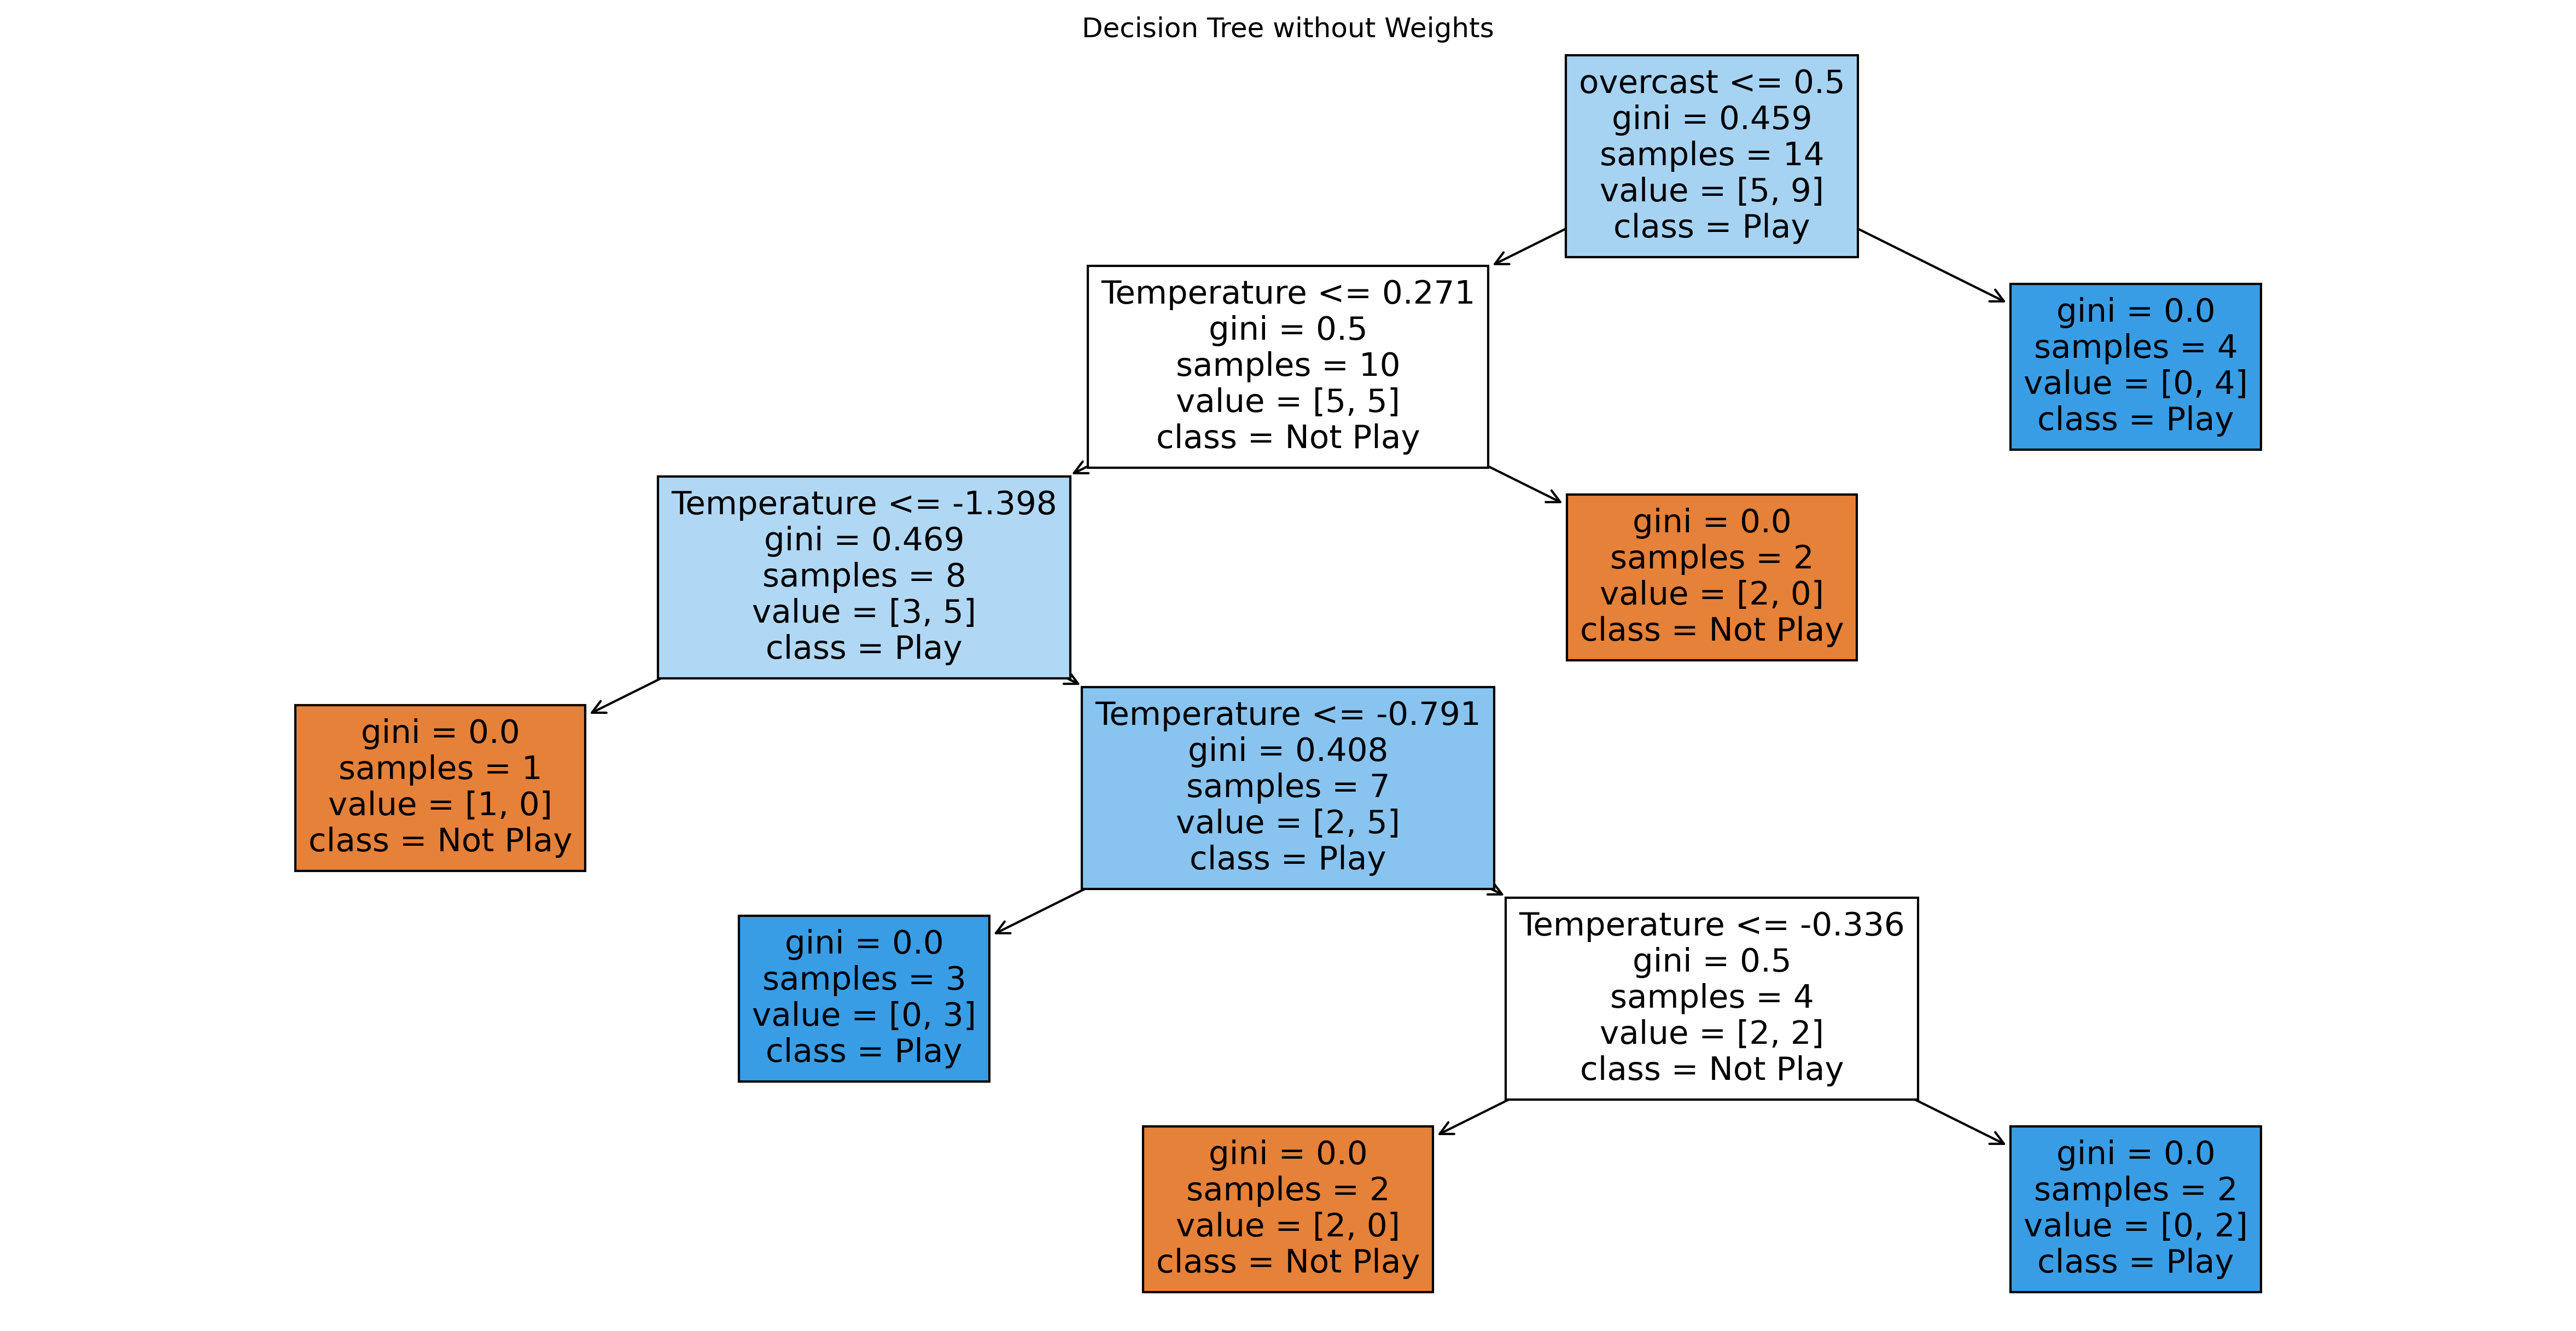

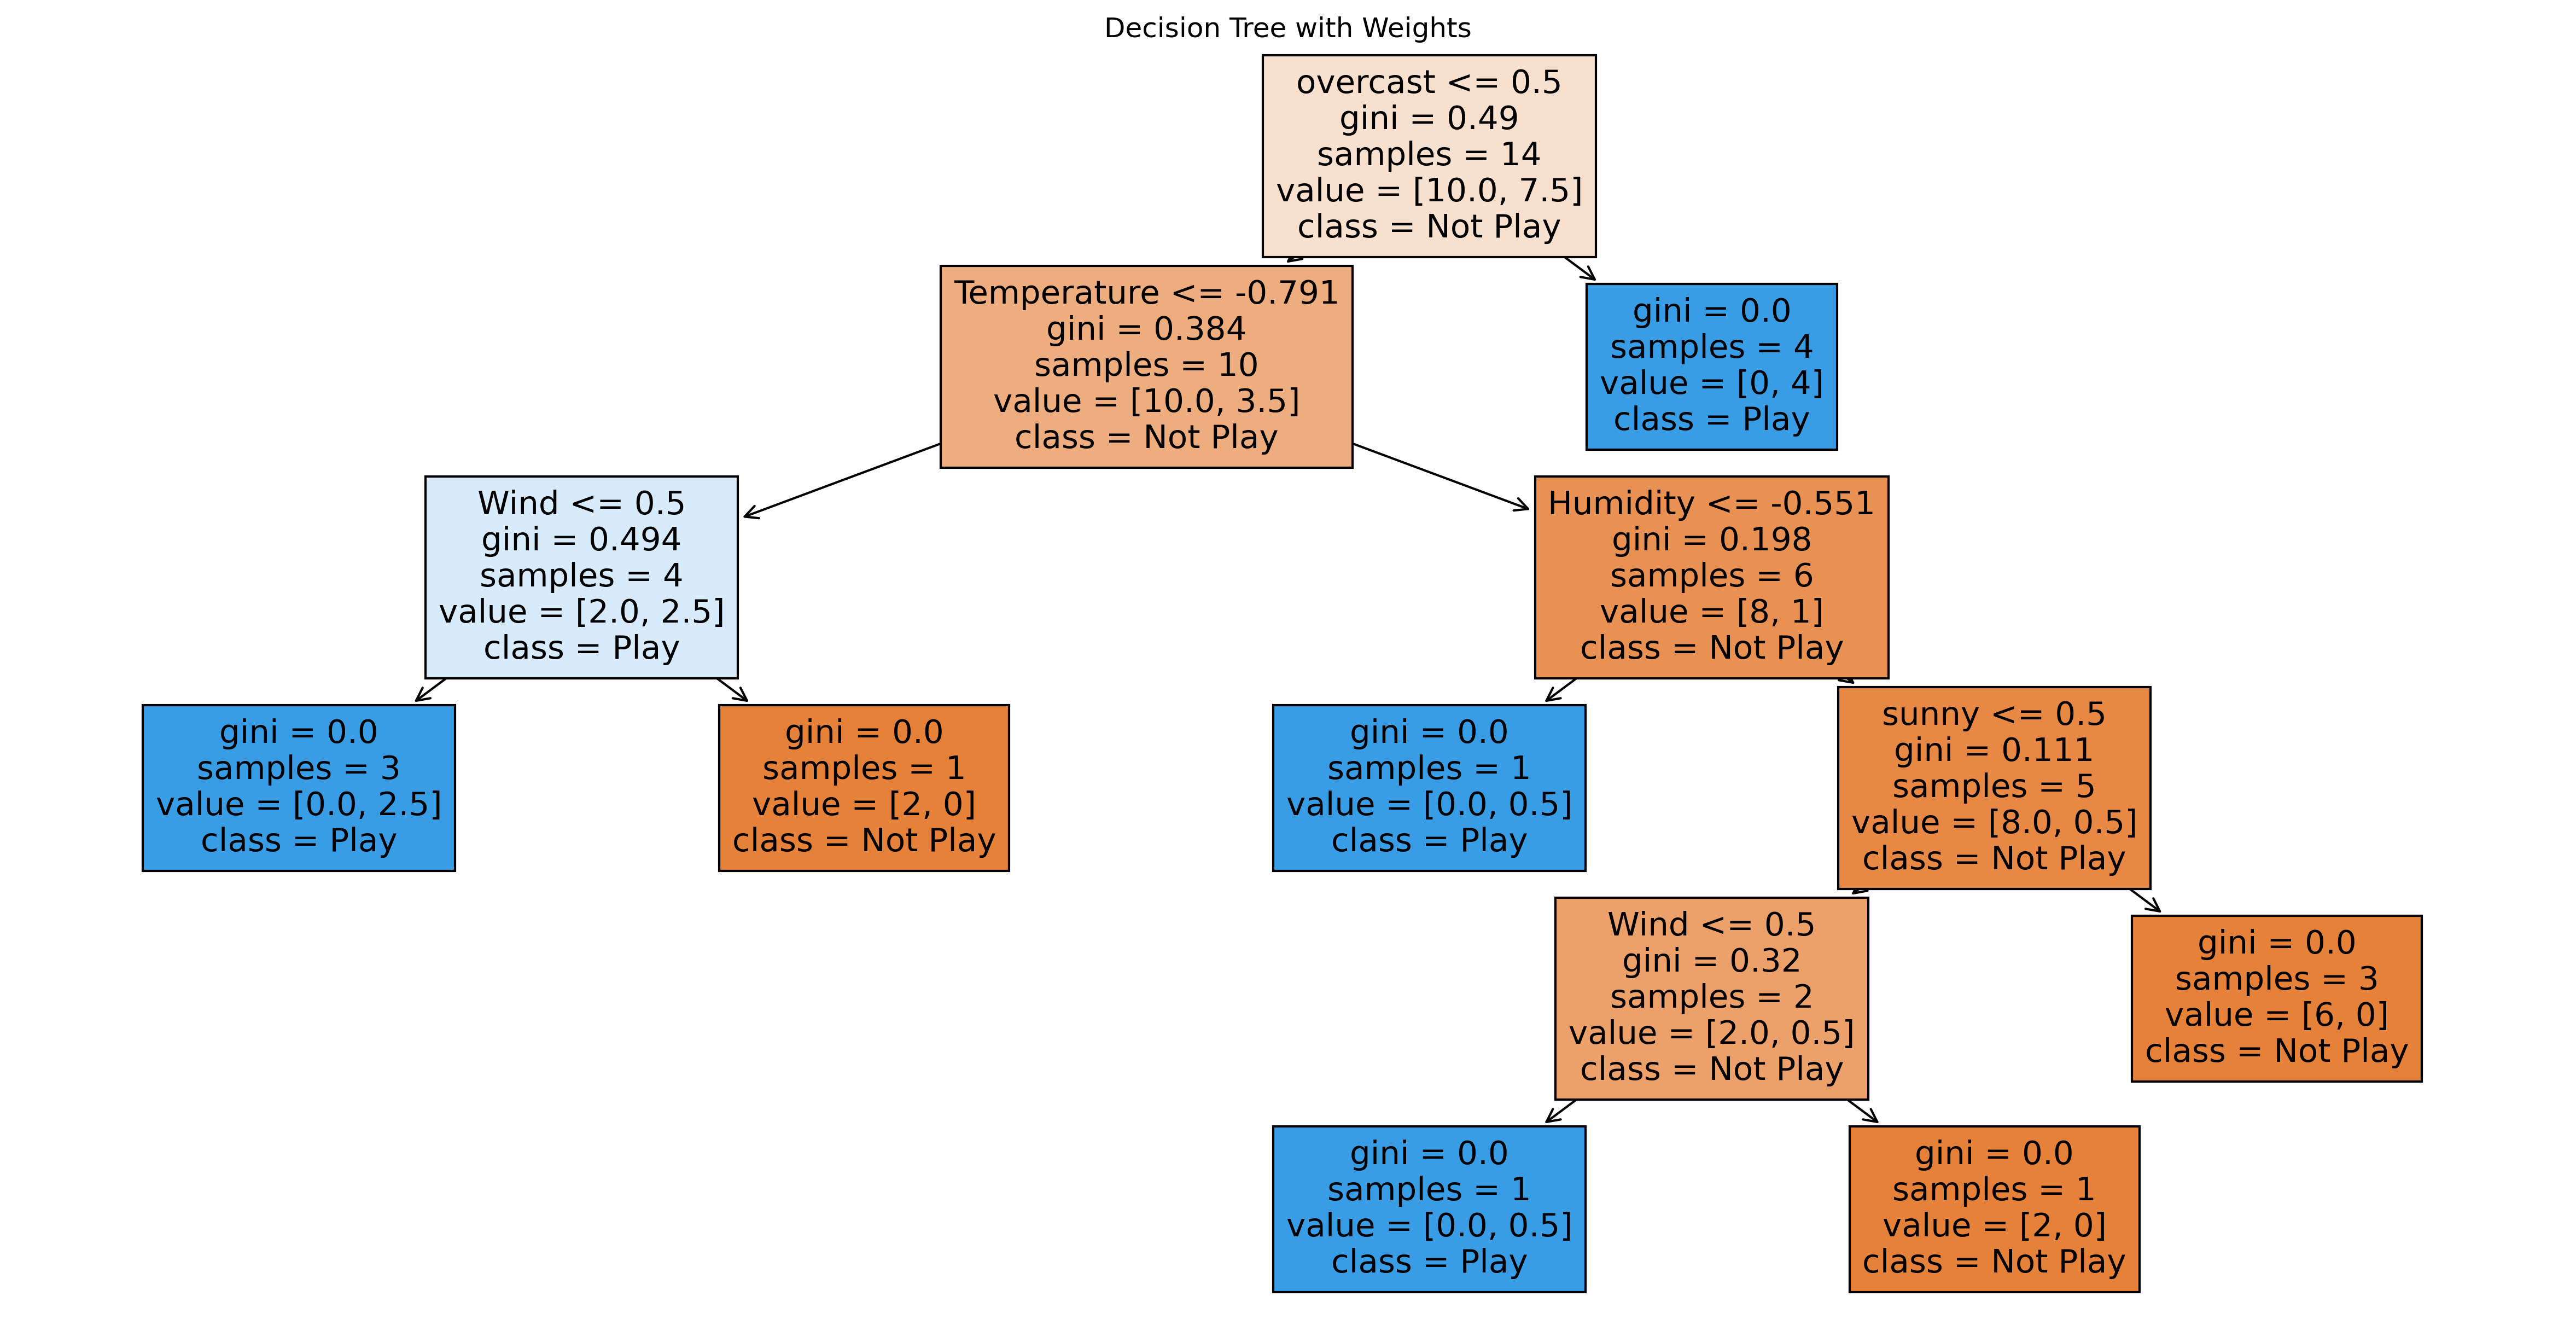

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.rcParams['figure.dpi'] = 300

# Fit a Decision Tree without weights
dt_clf_no_weight = DecisionTreeClassifier()
dt_clf_no_weight.fit(X_train, y_clf_train)
y_pred_no_weight = dt_clf_no_weight.predict(X_test)

# Plot the decision tree without weight
plt.figure(figsize=(20, 10))
plot_tree(dt_clf_no_weight, filled=True, feature_names=X_train.columns, class_names=['Not Play', 'Play'])
plt.title("Decision Tree without Weights")
plt.show()

# Fit a Decision Tree with weights
sample_weights = [2,2,1,0.5,1,2,1,2,1,0.5,0.5,1,1,2]
dt_clf_with_weight = DecisionTreeClassifier()
dt_clf_with_weight.fit(X_train, y_clf_train, sample_weight=sample_weights)
y_pred_with_weight = dt_clf_with_weight.predict(X_test)

# Plot the decision tree with weight
plt.figure(figsize=(20, 10))
plot_tree(dt_clf_with_weight, filled=True, feature_names=X_train.columns, class_names=['Not Play', 'Play'])
plt.title("Decision Tree with Weights")
plt.show()

<div class='markdown-google-sans'>

### **Main Mechanism**
</div>
<img src="https://i.imgur.com/xIakOPl.png" width=750 />



<div class='markdown-google-sans'>

### **Algorithm Steps**
</div>

<div class='markdown-google-sans'>

#### **📊　Dataset & Libraries Used**
</div>


<img src="https://i.imgur.com/2YjJmVV.png" width=750 />



In [ ]:
# Importing Necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd

np.set_printoptions(edgeitems=30, formatter={'float_kind': '{:.2f}'.format})
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.width = 0

import numpy as np

# Read Data
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Reorder the DataFrame
df = df[['sunny','overcast','rain','Temperature','Humidity','Wind','Play', 'Num_Players']]

# Set feature matrix X and target vector y for both classification
X, y_clf = df.drop(['Play','Num_Players'], axis=1), df['Play']
X_train, X_test, y_clf_train, y_clf_test = train_test_split(X, y_clf, train_size=0.5, shuffle=False)

# Set feature matrix X and target vector y for regression
X, y_reg = df.drop(['Play','Num_Players'], axis=1), df['Num_Players']
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, train_size=0.5, shuffle=False)

# Apply scaling to numerical columns
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

print(pd.concat([X_train, y_clf_train, y_reg_train], axis=1), '\n')
print(pd.concat([X_test, y_clf_test, y_reg_test], axis=1))

    sunny  overcast  rain  Temperature  Humidity  Wind  Play  Num_Players
0       1         0     0         1.80      0.50     0     0           52
1       1         0     0         1.02      1.02     1     0           39
2       0         1     0         1.49     -0.24     0     1           43
3       0         0     1        -0.56      1.66     0     1           37
4       0         0     1        -0.88     -0.03     0     1           28
5       0         0     1        -1.35     -1.08     1     0           19
6       0         1     0        -1.51     -1.61     1     1           43
7       1         0     0        -0.25      1.55     0     0           47
8       1         0     0        -0.72     -1.08     0     1           56
9       0         0     1         0.23     -0.03     0     1           33
10      1         0     0         0.23     -1.08     1     1           49
11      0         1     0        -0.25      1.02     1     1           23
12      0         1     0         1.17

<div class='markdown-google-sans'>

#### **Preparation Phase**
</div>

<img src="https://i.imgur.com/br2z1wa.png" width=750 />

<img src="https://i.imgur.com/1Indqnn.png" width=750 />



In [ ]:
# Create the base models
dt_clf = DecisionTreeClassifier(max_depth=1)

# Set the number of estimators
n_estimators = 20

<div class='markdown-google-sans'>

#### **Training Phase**
</div>
<img src="https://i.imgur.com/92i6dfQ.png" width=750 />
<br><br>

<img src="https://i.imgur.com/L29ZqPo.png" width=750 />
<br><br>

<img src="https://i.imgur.com/DtiVdlS.png" width=750 />
<br><br>

<img src="https://i.imgur.com/B0B0E2S.png" width=750 />
<br><br>

<img src="https://i.imgur.com/L9fNlyv.png" width=750 />
<br><br>

<img src="https://i.imgur.com/jZVh0Bm.png" width=750 />

<img src="https://i.imgur.com/4VIW9Bh.png" width=750 />


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Define & fit the model
ada_clf = AdaBoostClassifier(estimator=dt_clf, n_estimators=20, algorithm='SAMME')
ada_clf.fit(X_train, y_clf_train)

# Print the weights and accuracy of each model
for i, model in enumerate(ada_clf.estimators_):
    model_weight = ada_clf.estimator_weights_[i]
    print(f"Estimator {i+1:2}: Weight = {model_weight:.2f}")

Estimator  1: Weight = 0.59
Estimator  2: Weight = 1.25
Estimator  3: Weight = 0.75
Estimator  4: Weight = 0.99
Estimator  5: Weight = 1.13
Estimator  6: Weight = 0.41
Estimator  7: Weight = 0.53
Estimator  8: Weight = 0.58
Estimator  9: Weight = 0.82
Estimator 10: Weight = 0.68
Estimator 11: Weight = 0.56
Estimator 12: Weight = 0.61
Estimator 13: Weight = 0.51
Estimator 14: Weight = 0.67
Estimator 15: Weight = 0.77
Estimator 16: Weight = 0.70
Estimator 17: Weight = 0.96
Estimator 18: Weight = 0.88
Estimator 19: Weight = 0.73
Estimator 20: Weight = 0.73


<div class='markdown-google-sans'>

#### **Prediction Phase**
</div>
<img src="https://i.imgur.com/0gGlwMa.png" width=750 />
<br><br>

<img src="https://i.imgur.com/d0dJQYy.png" width=750 />


In [ ]:
# Predict the test data
y_clf_pred = ada_clf.predict(X_test)

<div class='markdown-google-sans'>

#### **Evaluation Phase**
</div>
<img src="https://i.imgur.com/1Bw9qTf.png" width=750 />



In [ ]:
# Print the weights and accuracy of each model
for i, model in enumerate(ada_clf.estimators_):
    model_pred_test = model.predict(X_test)
    model_accuracy_test = accuracy_score(y_clf_test, model_pred_test)
    print(f"Estimator {i+1:2}: Test Accuracy = {model_accuracy_test:.4f}")

print(f"Overall Accuracy: {accuracy_score(y_clf_test, y_clf_pred)}")

Estimator  1: Test Accuracy = 0.7143
Estimator  2: Test Accuracy = 0.5000
Estimator  3: Test Accuracy = 0.7143
Estimator  4: Test Accuracy = 0.6429
Estimator  5: Test Accuracy = 0.5000
Estimator  6: Test Accuracy = 0.7143
Estimator  7: Test Accuracy = 0.6429
Estimator  8: Test Accuracy = 0.3571
Estimator  9: Test Accuracy = 0.7143
Estimator 10: Test Accuracy = 0.7143
Estimator 11: Test Accuracy = 0.5000
Estimator 12: Test Accuracy = 0.6429
Estimator 13: Test Accuracy = 0.3571
Estimator 14: Test Accuracy = 0.5000
Estimator 15: Test Accuracy = 0.7143
Estimator 16: Test Accuracy = 0.2143
Estimator 17: Test Accuracy = 0.7143
Estimator 18: Test Accuracy = 0.7143
Estimator 19: Test Accuracy = 0.5000
Estimator 20: Test Accuracy = 0.7143
Overall Accuracy: 0.8571428571428571


<div class='markdown-google-sans'>

### **Key Parameters**
</div>

<div class='markdown-google-sans'>

#### **Base Estimator**
</div>
<img src="https://i.imgur.com/UkWwa2E.png" width=750 />


In [ ]:
# List of base estimators to try in AdaBoost
estimators = [
    DecisionTreeClassifier(max_depth=1),
    DecisionTreeClassifier(max_depth=3),
    LogisticRegression(C=0.001)  # High penalty (low C value)
]

# Loop through the estimators
for est in estimators:
    ada_clf = AdaBoostClassifier(estimator=est,  algorithm='SAMME', n_estimators=20)
    ada_clf.fit(X_train, y_clf_train)
    y_clf_pred = ada_clf.predict(X_test)
    accuracy = accuracy_score(y_clf_test, y_clf_pred)
    print(f"Base {est.__class__.__name__} (Max Depth: {est.max_depth if hasattr(est, 'max_depth') else 'N/A'}, C: {est.C if hasattr(est, 'C') else 'N/A'}) Accuracy: {accuracy:.4f}")

Base DecisionTreeClassifier (Max Depth: 1, C: N/A) Accuracy: 0.8571
Base DecisionTreeClassifier (Max Depth: 3, C: N/A) Accuracy: 0.7143
Base LogisticRegression (Max Depth: N/A, C: 0.001) Accuracy: 0.5714


<div class='markdown-google-sans'>

#### **Number of Estimators**
</div>
<img src="https://i.imgur.com/EAp8DLz.png" width=750 />


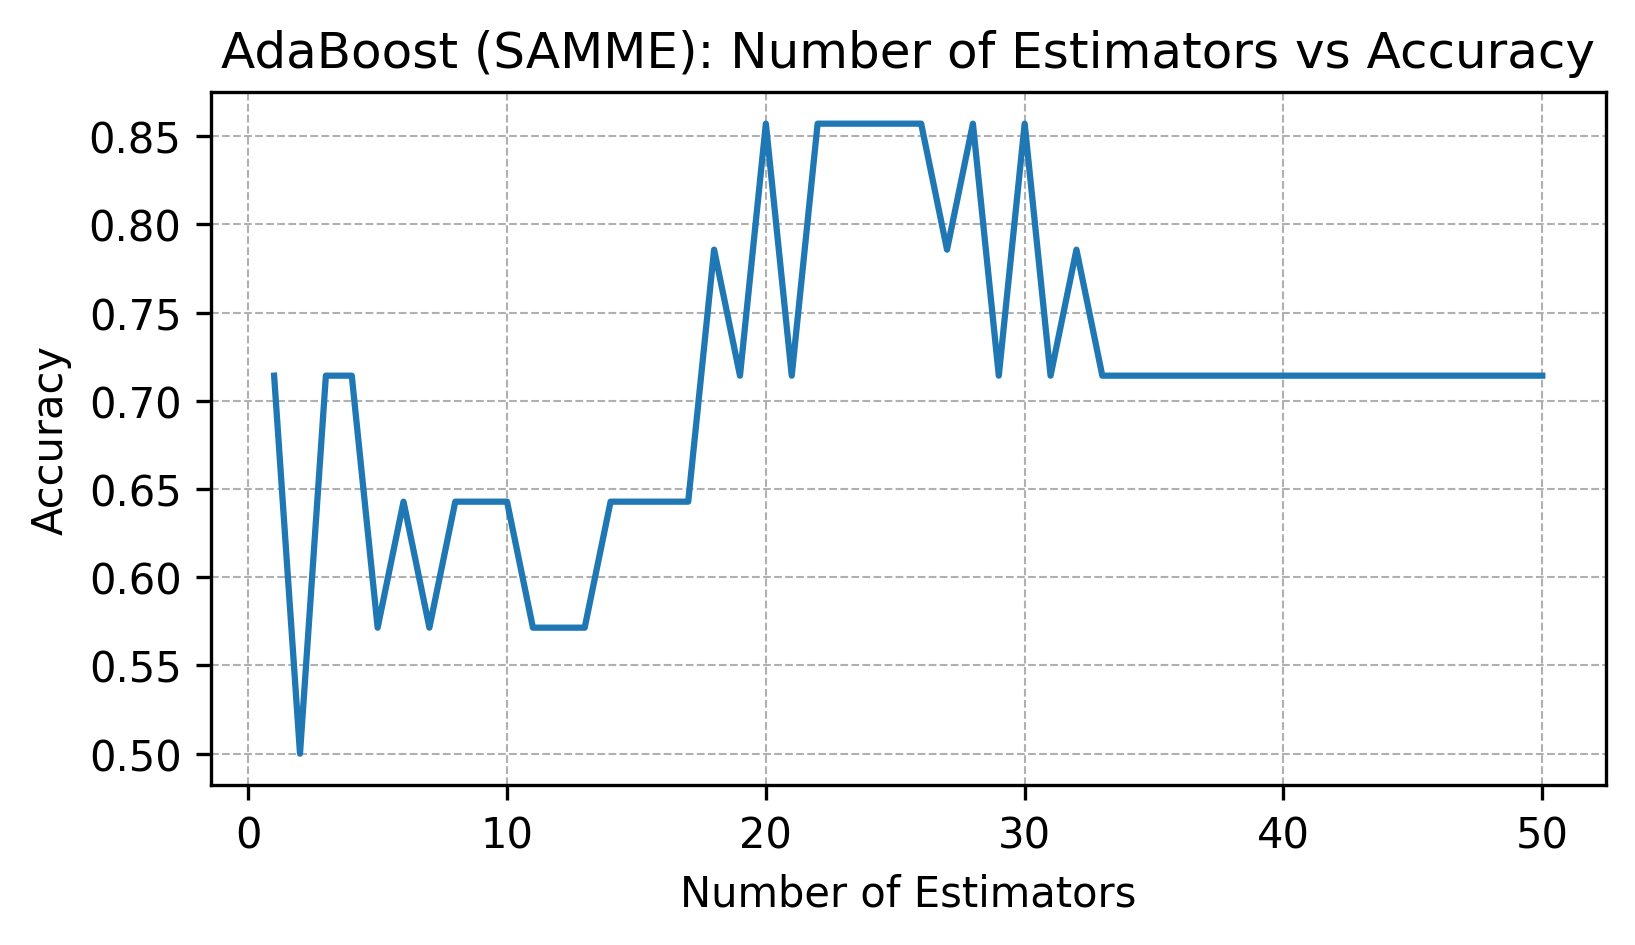

In [ ]:
import matplotlib.pyplot as plt

# Range of number of estimators
num_estimators = range(1, 51)

# List to store accuracies
accuracies = []

# Loop through the number of estimators
for num in num_estimators:
    ada_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                 n_estimators=num, algorithm='SAMME')
    ada_clf.fit(X_train, y_clf_train)
    y_clf_pred = ada_clf.predict(X_test)
    accuracy = accuracy_score(y_clf_test, y_clf_pred)
    accuracies.append(accuracy)
    #print(f"Num of Estimators {num:2} Accuracy: {accuracy:.4f}")

# Plotting
plt.figure(figsize=(6, 3))  # Setting the figure size for a 16:9 aspect ratio
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.plot(num_estimators, accuracies)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('AdaBoost (SAMME): Number of Estimators vs Accuracy')
plt.show()


<div class='markdown-google-sans'>

#### **Learning Rate**
</div>
<img src="https://i.imgur.com/4uMNWaS.png" width=750 />


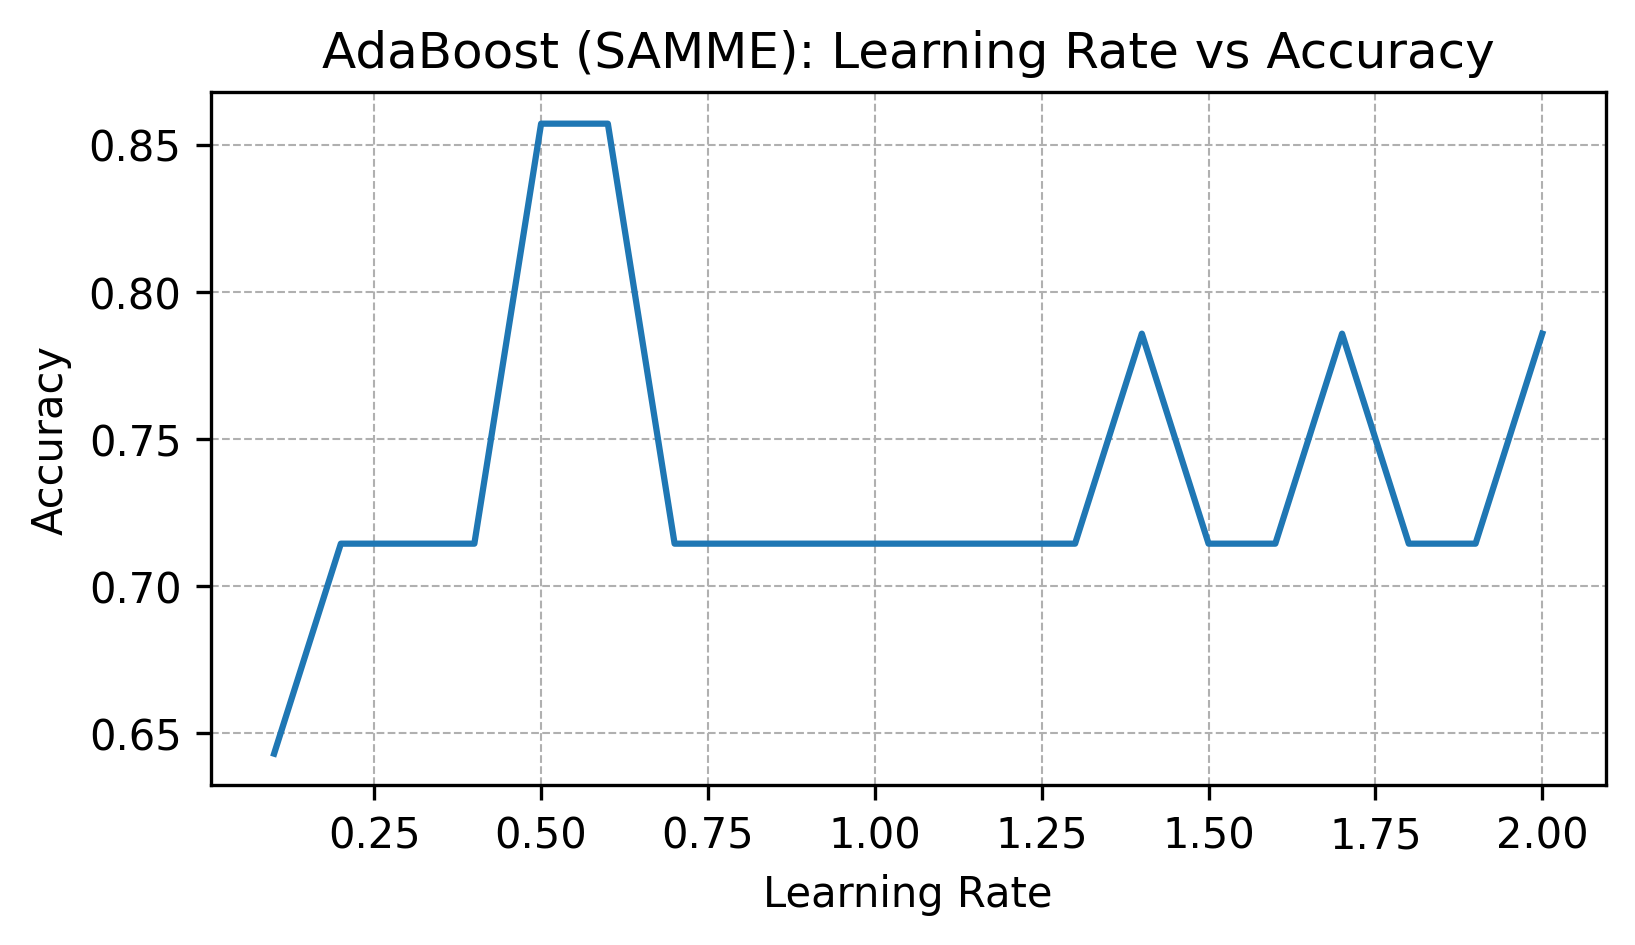

In [ ]:
# Range of learning rates
learning_rates = np.arange(0.1, 2.1, 0.1)

# List to store accuracies
accuracies = []

# Loop through the learning rates
for lr in learning_rates:
    ada_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                 learning_rate=lr, n_estimators=50, algorithm='SAMME')
    ada_clf.fit(X_train, y_clf_train)
    y_clf_pred = ada_clf.predict(X_test)
    accuracy = accuracy_score(y_clf_test, y_clf_pred)
    accuracies.append(accuracy)
    #print(f"Learning Rate {lr:.1f} Accuracy: {accuracy:.4f}")

# Plotting
plt.figure(figsize=(6, 3))  # Setting the figure size for a 16:9 aspect ratio
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.plot(learning_rates, accuracies)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('AdaBoost (SAMME): Learning Rate vs Accuracy')
plt.show()

<div class='markdown-google-sans'>

### **Pros and Cons**
</div>
<img src="https://i.imgur.com/SrEGwr2.png" width=750 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Adaptive Boosting Classifier Simplified**
</div>

In [ ]:
# IMPORT LIBRARIES ── Import necessary libraries for model training and evaluation.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import accuracy_score
from sklearn.ensemble        import AdaBoostClassifier
from sklearn.tree            import DecisionTreeClassifier

# LOAD DATASET ── Load the dataset from the provided URL and drop the target column 'Num_Players'.
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url).drop('Num_Players', axis=1)

# CHECK TARGET VARIABLE ── Define the target column for classification.
target_col = 'Play'

# SPLIT DATA ── Divide the dataset into 50% training and 50% testing sets without shuffling.
X, y_clf = df.drop(target_col, axis=1), df[target_col]
X_train, X_test, y_clf_train, y_clf_test = train_test_split(X, y_clf, train_size=0.5, shuffle=False)

# SCALE DATA ── Apply standard scaling to numerical columns to normalize data after splitting.
scaler = StandardScaler()
float_cols = X.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# DEFINE & FIT MODEL ── Initialize and train the AdaBoost Classifier model with specified parameters.
ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=10,
    learning_rate=0.1,
    algorithm='SAMME.R',
    random_state=None
)
ada_clf.fit(X_train, y_clf_train)

# PREDICT ── Make predictions using the trained model on the test data.
y_clf_pred = ada_clf.predict(X_test)

# EVALUATE ── Calculate and display the accuracy of the model.
print(f"Accuracy: {accuracy_score(y_clf_test, y_clf_pred)}")

Accuracy: 0.7857142857142857


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Adaptive Boosting Regressor Simplified**
</div>

In [ ]:
# IMPORT LIBRARIES ── Import necessary libraries for model training and evaluation.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import mean_squared_error
from sklearn.ensemble        import AdaBoostRegressor
from sklearn.tree            import DecisionTreeRegressor

# LOAD DATASET ── Load the dataset from the provided URL and drop the target column 'Play'.
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url).drop('Play', axis=1)

# CHECK TARGET VARIABLE ── Define the target column for regression.
target_col = 'Num_Players'

# SPLIT DATA ── Divide the dataset into 50% training and 50% testing sets without shuffling.
X, y_reg = df.drop(target_col, axis=1), df[target_col]
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, train_size=0.5, shuffle=False)

# SCALE DATA ── Apply standard scaling to numerical columns to normalize data after splitting.
scaler = StandardScaler()
float_cols = X.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# DEFINE & FIT MODEL ── Initialize and train the AdaBoost Regressor model with specified parameters.
ada_reg = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=1),
    n_estimators=20,
    learning_rate=0.1,
    loss='linear',
    random_state=None
)
ada_reg.fit(X_train, y_reg_train)

# PREDICT ── Make predictions using the trained model on the test data.
y_reg_pred = ada_reg.predict(X_test)

# EVALUATE ── Calculate and display the Root Mean Squared Error (RMSE) of the model.
print(f"RMSE: {mean_squared_error(y_reg_test, y_reg_pred, squared=False)}")


RMSE: 10.269020133305274


<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 06-3**
</div>
Using the following dataset, perform AdaBoost Classification with the base estimator `LogisticRegression(C=0.001)` and `n_estimators=50`. Print the accuracy.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection  import train_test_split
from sklearn.preprocessing    import StandardScaler
from sklearn.metrics          import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble     import AdaBoostClassifier

practice_dataset_url = "https://www.dropbox.com/scl/fi/p0n2vdwbve761sfoxrgf3/golf_dataset_mini_with_testset_practice.csv?rlkey=1r1mw6w9fhtxwijejbns1yknt&dl=0&raw=1"
practice_df = pd.read_csv(practice_dataset_url)
df = practice_df.copy()

target_col = 'Play'

# SPLIT DATA ── Divide the dataset into 50% training and 50% testing sets without shuffling.
X, y_clf = df.drop(target_col, axis=1), df[target_col]
X_train, X_test, y_clf_train, y_clf_test = train_test_split(X, y_clf, train_size=0.5, shuffle=False)

# SCALE DATA ── Apply standard scaling to numerical columns to normalize data after splitting.
scaler = StandardScaler()
float_cols = X.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# DEFINE & FIT MODEL ── Initialize and train the AdaBoost Classifier model with specified parameters.
ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=10,
    learning_rate=0.1,
    algorithm='SAMME.R',
    random_state=None
)
ada_clf.fit(X_train, y_clf_train)

# PREDICT ── Make predictions using the trained model on the test data.
y_clf_pred = ada_clf.predict(X_test)

# EVALUATE ── Calculate and display the accuracy of the model.
print(f"Accuracy: {accuracy_score(y_clf_test, y_clf_pred)}")


Accuracy: 0.5333333333333333


In [ ]:
df

,sunny,overcast,rain,Temperature,Humidity,Wind,Num_Players
0,1,0,0,85.0,85.0,0,52
1,1,0,0,80.0,90.0,1,39
2,0,1,0,83.0,78.0,0,43
3,0,0,1,70.0,96.0,0,37
4,0,0,1,68.0,80.0,0,28
5,0,0,1,65.0,70.0,1,19
6,0,1,0,64.0,65.0,1,43
7,1,0,0,72.0,95.0,0,47
8,1,0,0,69.0,70.0,0,56
9,0,0,1,75.0,80.0,0,33


<div class='markdown-google-sans'>

## **06.4**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Gradient Boosting**
</div>

<div class='markdown-google-sans'>

### **About Gradient Boosting**
</div>
<img src="https://i.imgur.com/IXi4ZNM.png" width=750 />


<div class='markdown-google-sans'>

### **Main Mechanism**
</div>
<img src="https://i.imgur.com/OahuvdO.png" width=750 />


<div class='markdown-google-sans'>

### **Algorithm Steps**
</div>

<div class='markdown-google-sans'>

#### **📊　Dataset & Libraries Used**
</div>


<img src="https://i.imgur.com/2YjJmVV.png" width=750 />



In [ ]:
# Importing Necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd

np.set_printoptions(edgeitems=30, formatter={'float_kind': '{:.2f}'.format})
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.width = 0

import numpy as np

# Read Data
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Reorder the DataFrame
df = df[['sunny','overcast','rain','Temperature','Humidity','Wind','Play', 'Num_Players']]

# Set feature matrix X and target vector y for both classification
X, y_clf = df.drop(['Play','Num_Players'], axis=1), df['Play']
X_train, X_test, y_clf_train, y_clf_test = train_test_split(X, y_clf, train_size=0.5, shuffle=False)

# Set feature matrix X and target vector y for regression
X, y_reg = df.drop(['Play','Num_Players'], axis=1), df['Num_Players']
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, train_size=0.5, shuffle=False)

# Apply scaling to numerical columns
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

print(pd.concat([X_train, y_clf_train, y_reg_train], axis=1), '\n')
print(pd.concat([X_test, y_clf_test, y_reg_test], axis=1))

    sunny  overcast  rain  Temperature  Humidity  Wind  Play  Num_Players
0       1         0     0         1.80      0.50     0     0           52
1       1         0     0         1.02      1.02     1     0           39
2       0         1     0         1.49     -0.24     0     1           43
3       0         0     1        -0.56      1.66     0     1           37
4       0         0     1        -0.88     -0.03     0     1           28
5       0         0     1        -1.35     -1.08     1     0           19
6       0         1     0        -1.51     -1.61     1     1           43
7       1         0     0        -0.25      1.55     0     0           47
8       1         0     0        -0.72     -1.08     0     1           56
9       0         0     1         0.23     -0.03     0     1           33
10      1         0     0         0.23     -1.08     1     1           49
11      0         1     0        -0.25      1.02     1     1           23
12      0         1     0         1.17

<div class='markdown-google-sans'>

#### **Preparation Phase**
</div>
<img src="https://i.imgur.com/Qfh8JaN.png" width=750 />

<img src="https://i.imgur.com/qbReyt8.png" width=750 />


<img src="https://i.imgur.com/ho3pRkb.png" width=750 />



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Set the number of estimators
n_estimators = 100

# Set the tree parameter, number of estimator, and loss function (criterion)
gb_reg = GradientBoostingRegressor(max_depth=3, n_estimators=100, criterion='squared_error')


<img src="https://i.imgur.com/cRy6sRj.png" width=750 />

<div class='markdown-google-sans'>

#### **Training Phase**
</div>
<img src="https://i.imgur.com/KC3ocaU.png" width=750 />

<img src="https://i.imgur.com/rzX1aIN.png" width=750 />

<img src="https://i.imgur.com/M8kz60U.png" width=750 />

<img src="https://i.imgur.com/cM8AlDz.png" width=750 />

<img src="https://i.imgur.com/SKftgEP.png" width=750 />

<img src="https://i.imgur.com/bIjVqbz.png" width=750 />

<img src="https://i.imgur.com/x57mJ7U.png" width=750 />


In [ ]:
# Fit the model
gb_reg.fit(X_train, y_reg_train)

# Initialize a variable to store the cumulative sum of predictions with the mean of the target variable
initial_pred = np.full(len(y_reg_train), y_reg_train.mean())
cumulative_pred = initial_pred.copy()

# Loop through each stage (tree) of the model
for i in range(gb_reg.n_estimators_):
    # Update cumulative predictions by adding the current stage's predictions
    stage_pred = gb_reg.estimators_[i, 0].predict(X_train) * 0.1
    cumulative_pred += stage_pred
    residuals = y_reg_train - cumulative_pred
    print(f"Model {i+1}:")
    print(f"Residual Pred (Scaled):\n{stage_pred.round(2)}")
    print(f"Cumulative Pred:\n{cumulative_pred.round(2)}")
    print(f"Residuals after Model {i+1}:\n{np.array(residuals).round(2)}")

Model 1:
Residual Pred (Scaled):
[1.49 0.56 0.52 -0.24 -0.94 -1.84 0.52 0.56 1.49 -0.24 1.49 -1.44 0.52
 -2.44]
Cumulative Pred:
[38.92 37.99 37.95 37.19 36.49 35.59 37.95 37.99 38.92 37.19 38.92 35.99
 37.95 34.99]
Residuals after Model 1:
[13.08 1.01 5.05 -0.19 -8.49 -16.59 5.05 9.01 17.08 -4.19 10.08 -12.99
 4.05 -21.99]
Model 2:
Residual Pred (Scaled):
[1.34 0.50 0.47 -0.22 -0.85 -1.66 0.47 0.50 1.34 -0.22 1.34 -1.30 0.47
 -2.20]
Cumulative Pred:
[40.26 38.49 38.42 36.97 35.64 33.93 38.42 38.49 40.26 36.97 40.26 34.69
 38.42 32.79]
Residuals after Model 2:
[11.74 0.51 4.58 0.03 -7.64 -14.93 4.58 8.51 15.74 -3.97 8.74 -11.69 3.58
 -19.79]
Model 3:
Residual Pred (Scaled):
[1.21 0.45 0.42 0.00 -0.58 -1.49 0.42 0.45 1.21 -0.58 1.21 -1.17 0.42
 -1.98]
Cumulative Pred:
[41.47 38.94 38.85 36.97 35.06 32.43 38.85 38.94 41.47 36.39 41.47 33.52
 38.85 30.81]
Residuals after Model 3:
[10.53 0.06 4.15 0.03 -7.06 -13.43 4.15 8.06 14.53 -3.39 7.53 -10.52 3.15
 -17.81]
Model 4:
Residual Pred (Sca

<div class='markdown-google-sans'>

#### **Prediction Phase**
</div>
<img src="https://i.imgur.com/l1jdAd4.png" width=750 />

<img src="https://i.imgur.com/hfcOede.png" width=750 />


<div class='markdown-google-sans'>

#### **Evaluation Phase**
</div>
<img src="https://i.imgur.com/xxhWqyj.png" width=750 />


<div class='markdown-google-sans'>

### **Key Parameters**
</div>

<div class='markdown-google-sans'>

#### **Number of Base Estimator**
</div>
<img src="https://i.imgur.com/14Imwmv.png" width=750 />


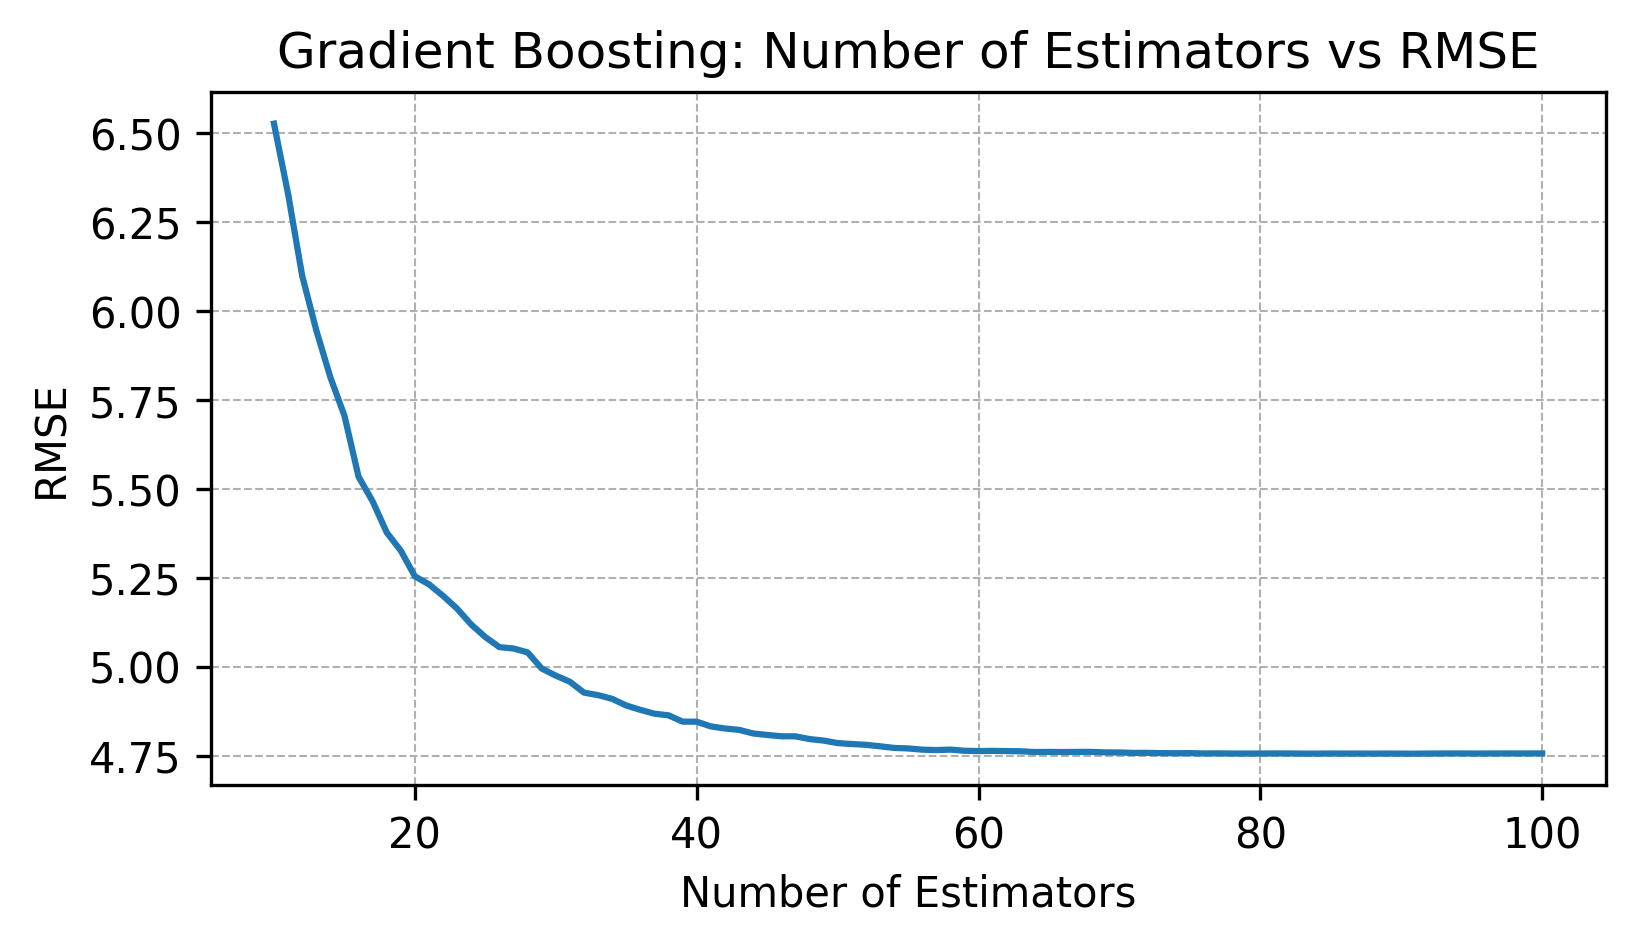

In [ ]:
# Range of number of estimators, testing every 5 units
num_estimators = range(10, 101, 1)

# List to store RMSE values
rmses = []

# Loop through the number of estimators
for num in num_estimators:
    gb_reg = GradientBoostingRegressor(n_estimators=num, random_state=42)
    gb_reg.fit(X_train, y_reg_train)
    y_reg_pred = gb_reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred))
    rmses.append(rmse)
    #print(f"Num of Estimators {num:2} RMSE: {rmse:.4f}")

# Plotting
plt.figure(figsize=(6, 3))  # Setting the figure size for a 16:9 aspect ratio
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.plot(num_estimators, rmses)
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE')
plt.title('Gradient Boosting: Number of Estimators vs RMSE')
plt.show()

<div class='markdown-google-sans'>

#### **Learning Rate**
</div>
<img src="https://i.imgur.com/Cdc05AB.png" width=750 />


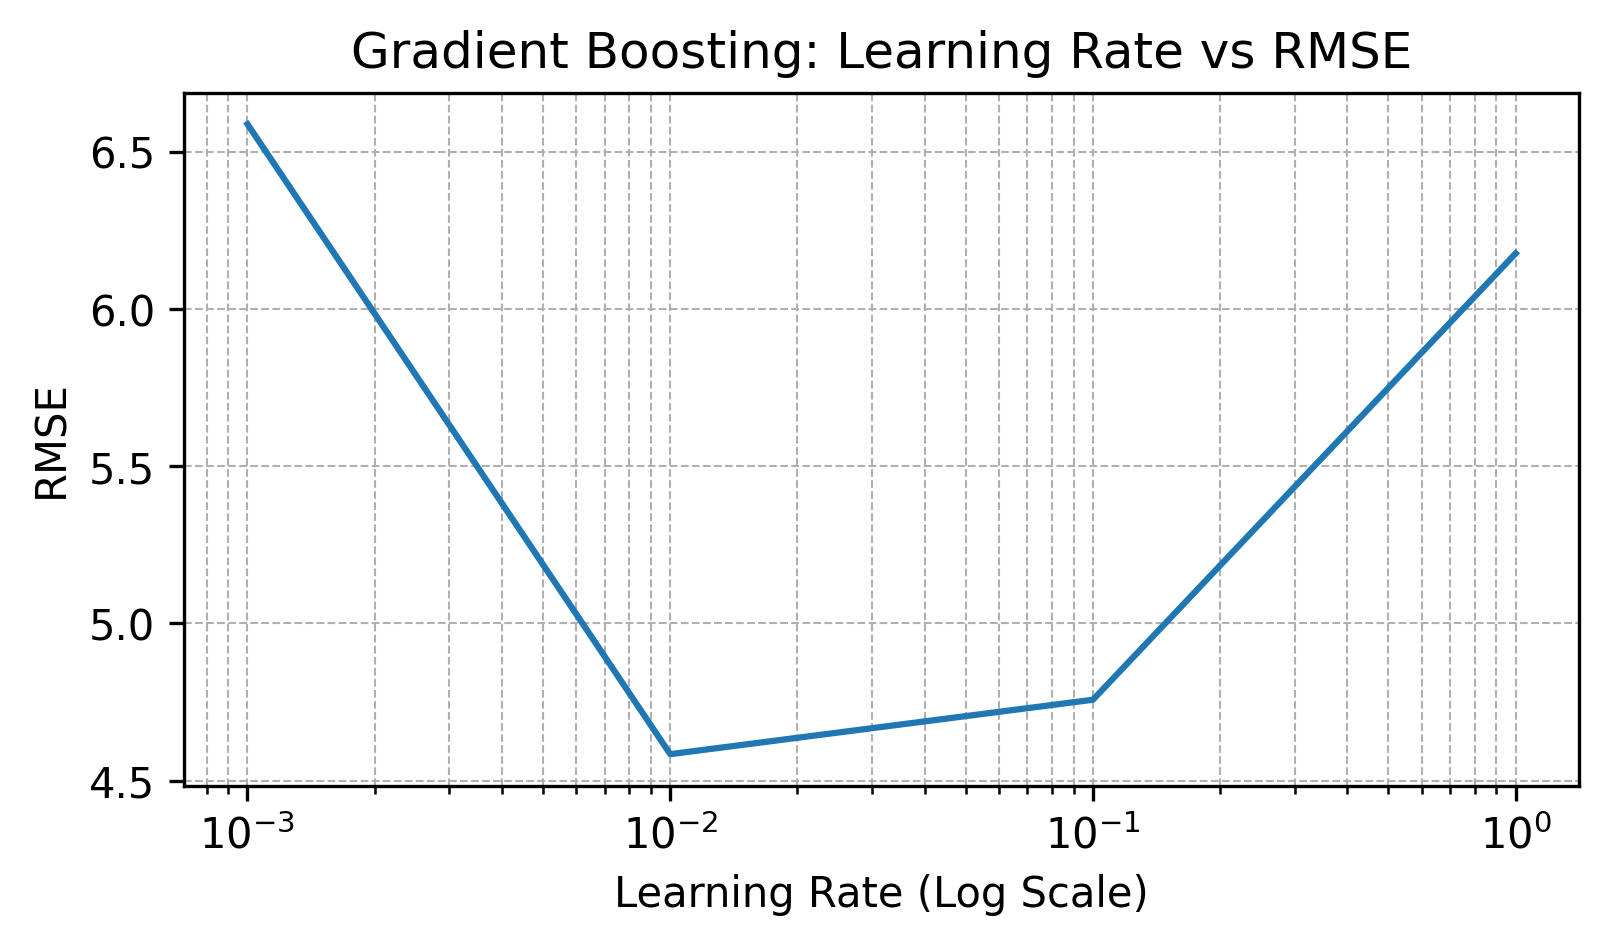

In [ ]:
# Range of learning rates with logarithmic scale
learning_rates = [0.001, 0.01, 0.1, 1]

# List to store RMSE values
rmses = []

# Loop through the learning rates
for lr in learning_rates:
    gb_reg = GradientBoostingRegressor(learning_rate=lr, random_state=42, n_estimators=1000)
    gb_reg.fit(X_train, y_reg_train)
    y_reg_pred = gb_reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred))
    rmses.append(rmse)
    #print(f"Learning Rate {lr} RMSE: {rmse:.4f}")

# Plotting
plt.figure(figsize=(6, 3))  # Setting the figure size for a 16:9 aspect ratio
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.semilogx(learning_rates, rmses, base=10)
plt.xlabel('Learning Rate (Log Scale)')
plt.ylabel('RMSE')
plt.title('Gradient Boosting: Learning Rate vs RMSE')
plt.show()

<div class='markdown-google-sans'>

#### **Max Depth**
</div>
<img src="https://i.imgur.com/RCZocns.png" width=750 />


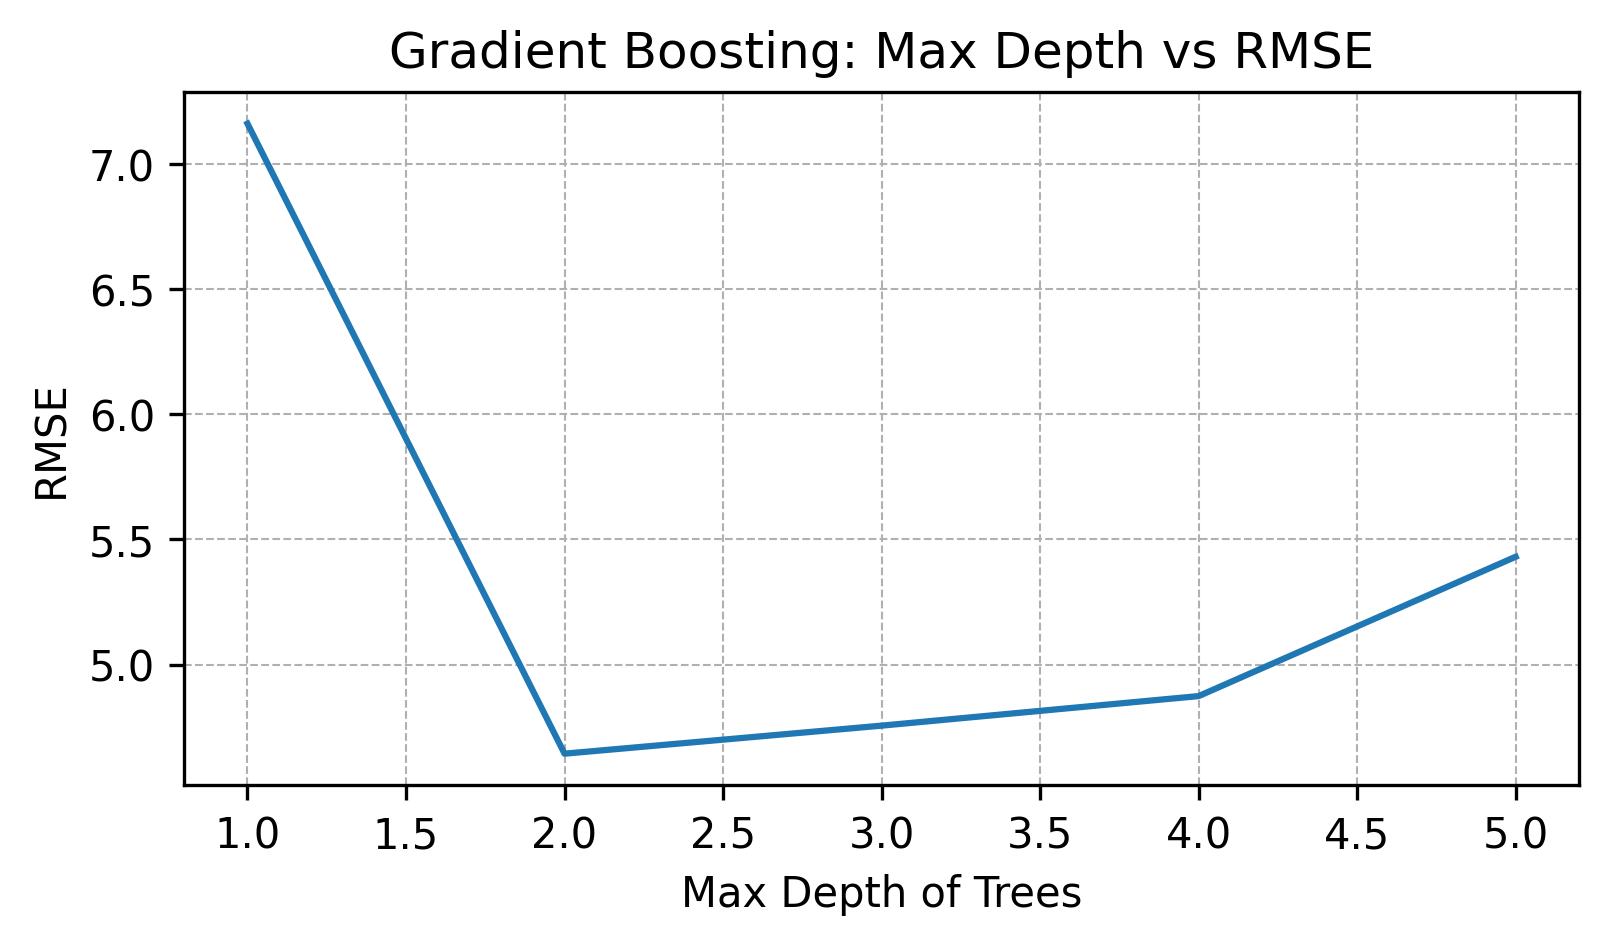

In [ ]:
# Range of max_depth values
max_depths = [1, 2, 3, 4, 5]

# List to store RMSE values
rmses = []

# Loop through the max_depth values
for depth in max_depths:
    gb_reg = GradientBoostingRegressor(max_depth=depth, random_state=42, n_estimators=100)
    gb_reg.fit(X_train, y_reg_train)
    y_reg_pred = gb_reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred))
    rmses.append(rmse)
    #print(f"Max Depth {depth} RMSE: {rmse:.4f}")

# Plotting
plt.figure(figsize=(6, 3))  # Setting the figure size for a 16:9 aspect ratio
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.plot(max_depths, rmses)
plt.xlabel('Max Depth of Trees')
plt.ylabel('RMSE')
plt.title('Gradient Boosting: Max Depth vs RMSE')
plt.show()

<div class='markdown-google-sans'>

#### **Algorithm Variations**
</div>

<div class='markdown-google-sans'>

#### **XGBoost**
</div>
<img src="https://i.imgur.com/RvmyC8g.png" width=750 />


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url).drop('Play', axis=1)

# Set target column
target_col = 'Num_Players'

# Split train & test data
X, y_reg = df.drop(target_col, axis=1), df[target_col]
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, train_size=0.5, shuffle=False)

# Scale the numerical (float) columns that are not target columns
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# Define & fit the model
xgb_reg = xgb.XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_reg_train)

# Predict the test data
y_reg_pred = xgb_reg.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred))
print(f"RMSE: {rmse}")

RMSE: 6.232991359004477


<div class='markdown-google-sans'>

#### **LightGBM**
</div>
<img src="https://i.imgur.com/zzHq9LJ.png" width=750 />


In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url).drop('Play', axis=1)

# Set target column
target_col = 'Num_Players'

# Split train & test data
X, y_reg = df.drop(target_col, axis=1), df[target_col]
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, train_size=0.5, shuffle=False)

# Scale the numerical (float) columns that are not target columns
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# Define & fit the model
lgb_reg = lgb.LGBMRegressor(min_data_in_bin=1, min_data_in_leaf=1, random_state=42)
lgb_reg.fit(X_train, y_reg_train)

# Predict the test data
y_reg_pred = lgb_reg.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred))
print(f"RMSE: {rmse}")

[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 6
[LightGBM] [Info] Start training from score 37.428571
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

<div class='markdown-google-sans'>

#### **CatBoost**
</div>
<img src="https://i.imgur.com/mVK2afu.png" width=750 />


In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url).drop('Play', axis=1)

# Set target column
target_col = 'Num_Players'

# SPLIT DATA ── Divide the dataset into 50% training and 50% testing sets without shuffling.
X, y_reg = df.drop(target_col, axis=1), df[target_col]
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, train_size=0.5, shuffle=False)

# Define & fit the model
cb_reg = CatBoostRegressor(random_state=42, silent=True)
cb_reg.fit(X_train, y_reg_train)

# Predict the test data
y_reg_pred = cb_reg.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred))
print(f"RMSE: {rmse}")

RMSE: 7.463401357226173


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Gradient Boosting Classifiers Simplified**
</div>

In [ ]:
# IMPORT LIBRARIES ── Import necessary libraries for model training and evaluation.
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import accuracy_score
from sklearn.ensemble        import GradientBoostingClassifier

#!pip install catboost
#from catboost import CatBoostClassifier
import xgboost as xgb
import lightgbm as lgb

# LOAD DATASET ── Load the dataset from the provided URL and drop the target column 'Num_Players'.
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url).drop('Num_Players', axis=1)

# SET TARGET COLUMN ── Define the target column for classification.
target_col = 'Play'

# SPLIT DATA ── Divide the dataset into 50% training and 50% testing sets without shuffling.
X, y_clf = df.drop(target_col, axis=1), df[target_col]
X_train, X_test, y_clf_train, y_clf_test = train_test_split(X, y_clf, train_size=0.5, shuffle=False)

# For tree-based ensemble methods such as Gradient Boosting, XGBoost, LightGBM, and CatBoost,
# feature scaling is generally not necessary

# DEFINE & FIT MODEL ── Initialize and train the Gradient Boosting Classifier model with default parameters.
gb_clf = GradientBoostingClassifier(random_state=42)
#gb_clf = xgb.XGBClassifier(random_state=42)
#gb_clf = lgb.LGBMClassifier(min_data_in_bin=1, min_data_in_leaf=1, random_state=42)
#gb_clf = CatBoostClassifier(random_state=42, silent=True)
gb_clf.fit(X_train, y_clf_train)

# PREDICT ── Make predictions using the trained model on the test data.
y_clf_pred = gb_clf.predict(X_test)

# EVALUATE ── Calculate and display the accuracy of the model.
print(f"Accuracy: {accuracy_score(y_clf_test, y_clf_pred)}")

Accuracy: 0.7857142857142857


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Gradient Boosting Regressors Simplified**
</div>

In [ ]:
# IMPORT LIBRARIES ── Import necessary libraries for model training and evaluation.
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import mean_squared_error
from sklearn.ensemble        import GradientBoostingRegressor

#!pip install catboost
#from catboost import CatBoostRegressor
import xgboost as xgb
import lightgbm as lgb

# LOAD DATASET ── Load the dataset from the provided URL and drop the target column 'Play'.
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url).drop('Play', axis=1)

# SET TARGET COLUMN ── Define the target column for regression.
target_col = 'Num_Players'

# SPLIT DATA ── Divide the dataset into 50% training and 50% testing sets without shuffling.
X, y_reg = df.drop(target_col, axis=1), df[target_col]
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, train_size=0.5, shuffle=False)

# For tree-based ensemble methods such as Gradient Boosting, XGBoost, LightGBM, and CatBoost,
# feature scaling is generally not necessary

# DEFINE & FIT MODEL ── Initialize and train the Gradient Boosting Regressor model with default parameters.
gb_reg = GradientBoostingRegressor(random_state=42)
#gb_reg = xgb.XGBRegressor(random_state=42)
#gb_reg = lgb.LGBMRegressor(min_data_in_bin=1, min_data_in_leaf=1, random_state=42)
#gb_reg = CatBoostRegressor(random_state=42, silent=True)
gb_reg.fit(X_train, y_reg_train)

# PREDICT ── Make predictions using the trained model on the test data.
y_reg_pred = gb_reg.predict(X_test)

# EVALUATE ── Calculate and display the Root Mean Squared Error (RMSE) of the model.
print(f"RMSE: {mean_squared_error(y_reg_test, y_reg_pred, squared=False)}")

RMSE: 4.756400379582905


<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 06-4**
</div>
Using the following dataset, perform regression with GradientBoosting with `learning_rate=0.001` and `n_estimators=1000`. Print the RMSE.

In [ ]:
# Answer
import pandas as pd
import numpy  as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor


# Load the dataset
practice_dataset_url = "https://www.dropbox.com/scl/fi/oea1a7t0tkb0juw0bkhm9/golf_dataset_mini_with_testset_practice_regression.csv?rlkey=l4m32p4j2rro3lwulj076qusv&dl=0&raw=1"
practice_df = pd.read_csv(practice_dataset_url)
df = practice_df.copy()

target_col = 'Num_Players'

# SPLIT DATA ── Divide the dataset into 50% training and 50% testing sets without shuffling.
X, y_reg = df.drop(target_col, axis=1), df[target_col]
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, train_size=0.5, shuffle=False)

# For tree-based ensemble methods such as Gradient Boosting, XGBoost, LightGBM, and CatBoost,
# feature scaling is generally not necessary

# DEFINE & FIT MODEL ── Initialize and train the Gradient Boosting Regressor model with default parameters.
gb_reg = GradientBoostingRegressor(random_state=42, learning_rate = 0.001, n_estimators = 1000)
#gb_reg = xgb.XGBRegressor(random_state=42)
#gb_reg = lgb.LGBMRegressor(min_data_in_bin=1, min_data_in_leaf=1, random_state=42)
#gb_reg = CatBoostRegressor(random_state=42, silent=True)
gb_reg.fit(X_train, y_reg_train)

# PREDICT ── Make predictions using the trained model on the test data.
y_reg_pred = gb_reg.predict(X_test)

# EVALUATE ── Calculate and display the Root Mean Squared Error (RMSE) of the model.
print(f"RMSE: {mean_squared_error(y_reg_test, y_reg_pred, squared=False)}")


RMSE: 2.297532668142071


<div class='markdown-google-sans'>

## **06.5**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Stacking**
</div>

<div class='markdown-google-sans'>

### **About Stacking**
</div>
<img src="https://i.imgur.com/2OGBx0B.png" width=750 />


<div class='markdown-google-sans'>

### **Main Mechanism**
</div>
<img src="https://i.imgur.com/oqGgBU9.png" width=750 />


<div class='markdown-google-sans'>

### **Algorithm Steps**
</div>

<div class='markdown-google-sans'>

#### **📊　Dataset & Libraries Used**
</div>


<img src="https://i.imgur.com/2YjJmVV.png" width=750 />



In [ ]:
# Importing Necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd

np.set_printoptions(edgeitems=30, formatter={'float_kind': '{:.2f}'.format})
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.width = 0

import numpy as np

# Read Data
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Reorder the DataFrame
df = df[['sunny','overcast','rain','Temperature','Humidity','Wind','Play', 'Num_Players']]

# Set feature matrix X and target vector y for both classification
X, y_clf = df.drop(['Play','Num_Players'], axis=1), df['Play']
X_train, X_test, y_clf_train, y_clf_test = train_test_split(X, y_clf, train_size=0.5, shuffle=False)

# Set feature matrix X and target vector y for regression
X, y_reg = df.drop(['Play','Num_Players'], axis=1), df['Num_Players']
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, train_size=0.5, shuffle=False)

# Apply scaling to numerical columns
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

print(pd.concat([X_train, y_clf_train, y_reg_train], axis=1), '\n')
print(pd.concat([X_test, y_clf_test, y_reg_test], axis=1))

    sunny  overcast  rain  Temperature  Humidity  Wind  Play  Num_Players
0       1         0     0         1.80      0.50     0     0           52
1       1         0     0         1.02      1.02     1     0           39
2       0         1     0         1.49     -0.24     0     1           43
3       0         0     1        -0.56      1.66     0     1           37
4       0         0     1        -0.88     -0.03     0     1           28
5       0         0     1        -1.35     -1.08     1     0           19
6       0         1     0        -1.51     -1.61     1     1           43
7       1         0     0        -0.25      1.55     0     0           47
8       1         0     0        -0.72     -1.08     0     1           56
9       0         0     1         0.23     -0.03     0     1           33
10      1         0     0         0.23     -1.08     1     1           49
11      0         1     0        -0.25      1.02     1     1           23
12      0         1     0         1.17

<div class='markdown-google-sans'>

#### **Preparation Phase**
</div>
<img src="https://i.imgur.com/IdhqFll.png" width=750 />


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.ensemble     import StackingClassifier
from sklearn.tree         import DecisionTreeClassifier
from sklearn.svm          import SVC

# Create the base learners
knn_clf = KNeighborsClassifier(n_neighbors=3)
dt_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

# Create the meta learners
lr_clf = LogisticRegression()

# Define the base learners
base_clfs = [
    ('knn', knn_clf),
    ('dt', dt_clf),
    ('svm', svm_clf)
]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors    import KNeighborsRegressor
from sklearn.ensemble     import StackingRegressor
from sklearn.tree         import DecisionTreeRegressor
from sklearn.svm          import SVR

# Create the base learners
knn_reg = KNeighborsRegressor(n_neighbors=3)
dt_reg = DecisionTreeRegressor(random_state=42)
svm_reg = SVR()

# Create the meta learner
lr_reg = LinearRegression()

# Define the base learners
base_regs = [
    ('knn', knn_reg),
    ('dt', dt_reg),
    ('svm', svm_reg)
]

<img src="https://i.imgur.com/SFMR9zZ.png" width=750 />


In [ ]:
# Validation Number
k = 3

# Initialize the Stacking Classifier
stack_clf = StackingClassifier(estimators=base_clfs, final_estimator=lr_clf, cv=k)

In [ ]:
# Validation Number
k = 3

# Initialize the Stacking Classifier
stack_reg = StackingRegressor(estimators=base_regs, final_estimator=lr_reg, cv=k)

<div class='markdown-google-sans'>

#### **Training Phase**
</div>
<img src="https://i.imgur.com/t9Snz1a.png" width=750 />

<img src="https://i.imgur.com/jYo3QsD.png" width=750 />

<img src="https://i.imgur.com/lSWJW8d.png" width=750 />

<img src="https://i.imgur.com/f1XmXqc.png" width=750 />

<img src="https://i.imgur.com/tE7SZfi.png" width=750 />

In [ ]:
from sklearn.model_selection import cross_val_predict

# Generate meta-features manually
meta_features = [cross_val_predict(estimator, X_train, y_clf_train, cv=k,
                                   method='predict_proba')[:, 1].round(0).astype('int')
                 for name, estimator in base_clfs]

# Combine meta-features into a DataFrame
meta_features_combined = pd.DataFrame(np.vstack(meta_features).T,
                                      columns=[f'{name}_pred' for name, _ in base_clfs])

print(meta_features_combined)

    knn_pred  dt_pred  svm_pred
0          1        1         1
1          1        1         1
2          1        1         1
3          1        0         1
4          0        1         1
5          1        1         1
6          1        1         1
7          1        0         1
8          1        1         1
9          1        0         1
10         1        1         1
11         0        1         1
12         1        1         1
13         1        1         1


In [ ]:
from sklearn.model_selection import cross_val_predict

# Generate meta-features manually
meta_features = [cross_val_predict(estimator, X_train, y_reg_train, cv=k,
                                   method='predict').round(2)
                 for name, estimator in base_regs]

# Combine meta-features into a DataFrame
meta_features_combined = pd.DataFrame(np.vstack(meta_features).T,
                                      columns=[f'{name}_pred' for name, _ in base_clfs])

print(meta_features_combined)

    knn_pred  dt_pred  svm_pred
0      40.67    47.00     42.15
1      34.33    47.00     42.07
2      41.33    42.00     41.89
3      34.33    13.00     41.73
4      21.67    13.00     41.00
5      30.00    28.00     38.06
6      30.00    28.00     38.69
7      33.00    13.00     38.05
8      30.00    28.00     38.87
9      27.67    49.00     38.01
10     36.00    39.00     40.87
11     41.00    43.00     40.17
12     42.67    43.00     41.43
13     26.67    19.00     39.11


<img src="https://i.imgur.com/7i4ZgX6.png" width=750 />

<img src="https://i.imgur.com/mwJvRxn.png" width=750 />


In [ ]:
# Fit the stacking classifier
stack_clf.fit(X_train, y_clf_train)

StackingClassifier(cv=3,
                   estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
                               ('dt', DecisionTreeClassifier(random_state=42)),
                               ('svm', SVC(probability=True, random_state=42))],
                   final_estimator=LogisticRegression())

In [ ]:
# Fit the stacking classifier
stack_reg.fit(X_train, y_reg_train)

StackingRegressor(cv=3,
                  estimators=[('knn', KNeighborsRegressor(n_neighbors=3)),
                              ('dt', DecisionTreeRegressor(random_state=42)),
                              ('svm', SVR())],
                  final_estimator=LinearRegression())

<div class='markdown-google-sans'>

#### **Prediction Phase**
</div>
<img src="https://i.imgur.com/5AlWZMH.png" width=750 />

<img src="https://i.imgur.com/mseRP3g.png" width=750 />


In [ ]:
for i, est in stack_clf.named_estimators_.items():
    y_base_pred = est.predict(X_test)
    print(f"Estimator {i:9} Pred: {y_base_pred}")

y_clf_pred = stack_clf.predict(X_test)
print(f"Stacking Classifier Pred: {y_clf_pred.round(1)}")

Estimator knn       Pred: [0 1 1 1 0 1 1 1 1 1 1 1 1 1]
Estimator dt        Pred: [0 1 1 0 0 1 1 0 0 1 0 1 0 1]
Estimator svm       Pred: [0 1 1 1 0 1 1 1 1 1 1 1 1 1]
Stacking Classifier Pred: [1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
for i, est in stack_reg.named_estimators_.items():
    y_base_pred = est.predict(X_test)
    print(f"Estimator {i:8} Pred: {y_base_pred.round(1)}")

y_reg_pred = stack_reg.predict(X_test)
print(f"Stacking Regressor Pred: {y_reg_pred.round(1)}")

Estimator knn      Pred: [46.00 35.70 24.70 43.30 46.00 26.00 41.30 32.70 44.70 44.70 49.00 35.00
 34.30 45.70]
Estimator dt       Pred: [39.00 23.00 33.00 49.00 39.00 13.00 23.00 33.00 49.00 43.00 49.00 23.00
 28.00 43.00]
Estimator svm      Pred: [39.70 39.00 38.20 40.60 40.20 37.60 40.50 37.60 40.50 41.10 40.80 39.20
 38.70 41.60]
Stacking Regressor Pred: [45.50 38.10 30.40 44.30 45.80 30.80 42.80 35.30 45.10 45.50 48.20 37.80
 37.10 46.50]


<div class='markdown-google-sans'>

#### **Evaluation Phase**
</div>
<img src="https://i.imgur.com/yBc2CMn.png" width=750 />


In [ ]:
for i, est in stack_clf.named_estimators_.items():
    y_base_pred = est.predict(X_test)
    base_accuracy = accuracy_score(y_clf_test, y_base_pred)
    print(f"Estimator {i:9} Accuracy: {base_accuracy.round(4)}")

stack_accuracy = accuracy_score(y_clf_test, y_clf_pred)
print(f"Stacking Classifier Accuracy: {stack_accuracy.round(4)}")

Estimator knn       Accuracy: 0.7857
Estimator dt        Accuracy: 0.7143
Estimator svm       Accuracy: 0.7857
Stacking Classifier Accuracy: 0.6429


In [ ]:
for i in y_reg_pred:
  print(round(i,2))

45.49
38.11
30.36
44.34
45.83
30.83
42.78
35.34
45.12
45.5
48.2
37.83
37.09
46.46


In [ ]:
for i, est in stack_reg.named_estimators_.items():
    y_base_pred = est.predict(X_test)
    base_rmse = mean_squared_error(y_reg_test, y_base_pred, squared=False)
    print(f"Estimator {i:8} RMSE: {base_rmse.round(4)}")

stack_rmse = mean_squared_error(y_reg_test, y_reg_pred, squared=False)
print(f"Stacking Regressor RMSE: {stack_rmse.round(4)}")

Estimator knn      RMSE: 8.5049
Estimator dt       RMSE: 5.5291
Estimator svm      RMSE: 12.069
Stacking Regressor RMSE: 10.1052


<div class='markdown-google-sans'>

### **Key Parameters**
</div>

<div class='markdown-google-sans'>

#### **Cross-validation Strategy**
</div>
<img src="https://i.imgur.com/gi4bOpQ.png" width=750 />


In [ ]:
# List of CV strategies to try
cv_strategies = [3, 4, 5]

# Loop through the CV strategies
for cv in cv_strategies:
    stack_clf = StackingClassifier(estimators=[('knn', knn_clf), ('dt', dt_clf), ('svm', svm_clf)],
                                   final_estimator=lr_clf,
                                   cv=cv)
    stack_clf.fit(X_train, y_clf_train)
    y_clf_pred = stack_clf.predict(X_test)
    accuracy = accuracy_score(y_clf_test, y_clf_pred)
    print(f"CV {cv} Accuracy: {accuracy:.4f}")

CV 3 Accuracy: 0.6429
CV 4 Accuracy: 0.6429
CV 5 Accuracy: 0.6429


In [ ]:
# List of CV strategies to try
cv_strategies = [3, 4, 5]

# Loop through the CV strategies
for cv in cv_strategies:
    stack_reg = StackingRegressor(estimators=[('knn', knn_reg), ('dt', dt_reg), ('svm', svm_reg)],
                                   final_estimator=lr_reg,
                                   cv=cv)
    stack_reg.fit(X_train, y_reg_train)
    y_reg_pred = stack_reg.predict(X_test)
    rmse = mean_squared_error(y_reg_test, y_reg_pred, squared=False)
    print(f"CV {cv} RMSE: {rmse:.2f}")

CV 3 RMSE: 10.11
CV 4 RMSE: 7.42
CV 5 RMSE: 12.59


<div class='markdown-google-sans'>

#### **Passthrough Strategy**
</div>
<img src="https://i.imgur.com/7yyDdCH.png" width=750 />


In [ ]:
# Loop through with and without passthrough
for passthrough in [True, False]:
    stack_clf = StackingClassifier(estimators=[('knn', knn_clf), ('dt', dt_clf), ('svm', svm_clf)],
                                   final_estimator=lr_clf, cv=3,
                                   passthrough=passthrough)
    stack_clf.fit(X_train, y_clf_train)
    y_clf_pred = stack_clf.predict(X_test)
    accuracy = accuracy_score(y_clf_test, y_clf_pred)
    print(f"Passthrough={passthrough} Accuracy: {accuracy:.4f}")

Passthrough=True Accuracy: 0.8571
Passthrough=False Accuracy: 0.6429


In [ ]:
# Loop through with and without passthrough
for passthrough in [True, False]:
    stack_reg = StackingRegressor(estimators=[('knn', knn_reg), ('dt', dt_reg), ('svm', svm_reg)],
                                   final_estimator=lr_reg, cv=3,
                                   passthrough=passthrough)
    stack_reg.fit(X_train, y_reg_train)
    y_reg_pred = stack_reg.predict(X_test)
    rmse = mean_squared_error(y_reg_test, y_reg_pred, squared=False)
    print(f"Passthrough={passthrough} RMSE: {rmse:.2f}")

Passthrough=True RMSE: 8.86
Passthrough=False RMSE: 10.11


<div class='markdown-google-sans'>

### **Pros and Cons**
</div>
<img src="https://i.imgur.com/7Uzs4F6.png" width=750 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Stacking Classifier Simplified**
</div>

In [ ]:
import pandas as pd
import numpy  as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.ensemble     import StackingClassifier
from sklearn.tree         import DecisionTreeClassifier

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url).drop('Num_Players', axis=1)

# Set target column
target_col = 'Play'

# Scale the numerical (not one-hot-encoded) columns that are not target columns
scaler = StandardScaler()
float_cols = df.drop(target_col, axis=1).select_dtypes(include=['float64']).columns
df[float_cols] = scaler.fit_transform(df[float_cols])

# Split train & test data
X, y_clf = df.drop(target_col, axis=1), df[target_col]
X_train, X_test, y_clf_train, y_clf_test = train_test_split(X, y_clf, train_size=0.5, shuffle=False)

# Define & fit the model
stack_clf = StackingClassifier(estimators=[
                                ('knn', KNeighborsClassifier(n_neighbors=3)),
                                ('dt', DecisionTreeClassifier(random_state=42)),
                                ('svm', SVC(C=0.1))],
                               final_estimator=DecisionTreeClassifier(random_state=42))
stack_clf.fit(X_train, y_clf_train)

# Predict the test data
y_clf_pred = stack_clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_clf_test, y_clf_pred)}")

Accuracy: 0.7857142857142857


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Stacking Regressor Simplified**
</div>

In [ ]:
import pandas as pd
import numpy  as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.neighbors    import KNeighborsRegressor
from sklearn.ensemble     import StackingRegressor
from sklearn.tree         import DecisionTreeRegressor

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url).drop('Play', axis=1)

# Set target column
target_col = 'Num_Players'

# Scale the numerical (float) columns that are not target columns
scaler = StandardScaler()
float_cols = df.drop(target_col, axis=1).select_dtypes(include=['float64']).columns
df[float_cols] = scaler.fit_transform(df[float_cols])

# Split train & test data
X, y_reg = df.drop(target_col, axis=1), df[target_col]
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, train_size=0.5, shuffle=False)

# Define & fit the model
stack_reg = StackingRegressor(estimators=[
                                ('knn', KNeighborsRegressor(n_neighbors=4)),
                                ('dt', DecisionTreeRegressor(random_state=42)),
                                ('svm', SVR(C=0.1))],
                               final_estimator=DecisionTreeRegressor(random_state=42))
stack_reg.fit(X_train, y_reg_train)

# Predict the test data
y_reg_pred = stack_reg.predict(X_test)

# Evaluate the model
print(f"RMSE: {mean_squared_error(y_reg_test, y_reg_pred, squared=False)}")

NameError: name 'SVR' is not defined

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 06-5**
</div>
Using the following dataset, perform Stacking with the following 5 estimators (same as Practice 06-1): `KNeighborsClassifier`, `DecisionTreeClassifier`, `LogisticRegression`, `BernoulliNB`, `SVC`. Then use Logistic Regression (default values) as the meta-learner. Print the Accuracy.

In [ ]:
# Answer

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes  import BernoulliNB
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.ensemble     import StackingClassifier
from sklearn.tree         import DecisionTreeClassifier
from sklearn.svm          import SVC

practice_dataset_url = "https://www.dropbox.com/scl/fi/p0n2vdwbve761sfoxrgf3/golf_dataset_mini_with_testset_practice.csv?rlkey=1r1mw6w9fhtxwijejbns1yknt&dl=0&raw=1"
practice_df = pd.read_csv(practice_dataset_url)
df = practice_df.copy()

target_col = 'Play'

# Scale the numerical (float) columns that are not target columns
scaler = StandardScaler()
float_cols = df.drop(target_col, axis=1).select_dtypes(include=['float64']).columns
df[float_cols] = scaler.fit_transform(df[float_cols])

# Split train & test data
X, y_reg = df.drop(target_col, axis=1), df[target_col]
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, train_size=0.5, shuffle=False)

# Define & fit the model
stack_reg = StackingRegressor(estimators=[
                                ('knn', KNeighborsRegressor(n_neighbors=4)),
                                ('dt', DecisionTreeRegressor(random_state=42)),
                                ('svm', SVR(C=0.1))],
                               final_estimator=DecisionTreeRegressor(random_state=42))
stack_reg.fit(X_train, y_reg_train)

# Predict the test data
y_reg_pred = stack_reg.predict(X_test)

# Evaluate the model
print(f"RMSE: {mean_squared_error(y_reg_test, y_reg_pred, squared=False)}")


<div class='markdown-google-sans'>

# <font size=7>**ASSIGNMENT** <font color="#B8D71D">──────────</font></font>
</div>

<div class='markdown-google-sans'>

### 📊　Dataset & Libraries Used
</div>

The following is the dataset that you will use for this exercise. Unlike the previous exercises, this is a **five**-year weather dataset in Golf Land :

1. **`Date`**: The date of the observation is made.

2. **`Month`**: The month of the year (obtained from `Date`)

3. **`Season`**: The season of the year.

4. **`DaytimeDuration`**: The duration of daytime
(in hour)

5. **`SunshineDuration`**: The duration of sunshine (not blocked by cloud) in a day (in hour).

6. **`Temperature`**: The average day-time temperature (in Celcius).

7. **`Humidity`**: The average day-time humidity (in %)

8. **`RainfallAmount`**: The amount of rainfall in a day (in mm)

9. **`LightningStrikes`**: The number of lightning strike happening in a day in Golf Land.

10. **`Outlook`**: The day's majority outlook (sunny, overcast, rainy, snowy)

## 🎯 **Classification Goal**

### Based on all the other weather conditions, can we predict whether **there will be a thunder (lightning strike > 0) or not**?

## 🎯 **Regression Goal**

### Based on all the other weather conditions, can we predict **how many lightning strikes** happening in a day?

Here's the dataset with **all necessary libraries (from the current and past lessons) already imported** so you don't have to import them again. The data is already loaded and preprocessed so you can just focus on the ensemble learning part.

In [ ]:
# IMPORTING LIBRARIES
# └─ Basic Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(edgeitems=30, formatter={'float_kind': '{:.2f}'.format})
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.width = 0

# └─ Data Preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# └─ Basic Classifiers & Regressors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,      LinearRegression, Lasso, Ridge
from sklearn.naive_bayes  import BernoulliNB,             GaussianNB
from sklearn.neighbors    import KNeighborsClassifier,    KNeighborsRegressor
from sklearn.dummy        import DummyClassifier,         DummyRegressor
from sklearn.tree         import DecisionTreeClassifier,  DecisionTreeRegressor, plot_tree
from sklearn.svm          import SVC,                     SVR

# └─ Ensemble Classifiers & Regressors
from sklearn.ensemble     import GradientBoostingClassifier,  GradientBoostingRegressor
from sklearn.ensemble     import RandomForestClassifier,      RandomForestRegressor
from sklearn.ensemble     import StackingClassifier,          StackingRegressor
from sklearn.ensemble     import AdaBoostClassifier,          AdaBoostRegressor
from sklearn.ensemble     import BaggingClassifier,           BaggingRegressor
from sklearn.ensemble     import VotingClassifier,            VotingRegressor
from sklearn.ensemble     import GradientBoostingRegressor
#!pip install catboost
#from catboost import CatBoostClassifier, CatBoostRegressor
import xgboost as xgb
import lightgbm as lgb

# └─ Classification & Regression Metrics
from sklearn.metrics       import mean_squared_error, accuracy_score, roc_curve

# GET DATA & ONE-HOT ENCODE ── Load the dataset and apply one-hot encoding to categorical attributes
dataset_url = "https://www.dropbox.com/scl/fi/aiy2iu2umt2uya941w5l7/golf_dataset_weather_seasonal_5year-2.csv?rlkey=yxeuy2c1b2435rr7zcp1ynm68&dl=0&raw=1"
df = pd.read_csv(dataset_url, index_col='Date')
df = pd.get_dummies(df, dtype=int).drop(columns='Month')
df['Thunder'] = (df['LightningStrikes'] > 0).astype(int)

# SPLIT DATA ── Split the dataset for classification & regression
target_clf = 'Thunder'
target_reg = 'LightningStrikes'

# └─ Classification
X, y_clf = df.drop([target_reg, target_clf], axis=1), df[target_clf]
X_train, X_test, y_clf_train, y_clf_test = train_test_split(X, y_clf, train_size=0.7, stratify=y_clf, random_state=42)

# └─ Regression
X, y_reg = df.drop([target_reg, target_clf], axis=1), df[target_reg]
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, train_size=0.7, stratify=y_clf, random_state=42)

# SCALE DATA ── Apply appropriate scaling to numerical variables
scaler_mm = MinMaxScaler()
scaler_rb = RobustScaler()
scaler_std = StandardScaler()

X_train[['DaytimeDuration']] = scaler_mm.fit_transform(X_train[['DaytimeDuration']])
X_train[['SunshineDuration']] = scaler_rb.fit_transform(X_train[['SunshineDuration']])
X_train[['Temperature']] = scaler_std.fit_transform(X_train[['Temperature']])
X_train[['Humidity']] = scaler_std.fit_transform(X_train[['Humidity']])
X_train[['RainfallAmount']] = scaler_std.fit_transform(X_train[['RainfallAmount']])

X_test[['DaytimeDuration']] = scaler_mm.transform(X_test[['DaytimeDuration']])
X_test[['SunshineDuration']] = scaler_rb.transform(X_test[['SunshineDuration']])
X_test[['Temperature']] = scaler_std.fit_transform(X_test[['Temperature']])
X_test[['Humidity']] = scaler_std.fit_transform(X_test[['Humidity']])
X_test[['RainfallAmount']] = scaler_std.fit_transform(X_test[['RainfallAmount']])

print(df.head())

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


            DaytimeDuration  SunshineDuration  Temperature  Humidity  RainfallAmount  \
Date                                                                                   
2019-01-01             9.57              2.71         3.12     53.18           25.20   
2019-01-02             9.58              7.62         5.93     50.37            0.11   
2019-01-03             9.59              5.29         4.94     51.36            8.34   
2019-01-04             9.60              0.98         0.99     55.30           41.23   
2019-01-05             9.62              0.98         0.81     55.49            2.97   

            LightningStrikes  Season_Autumn  Season_Spring  Season_Summer  Season_Winter  \
Date                                                                                       
2019-01-01                 0              0              0              0              1   
2019-01-02                 0              0              0              0              1   
2019-01-03     

<div class='markdown-google-sans'>

## **6.2**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Bagging**
</div>

In [ ]:
## CLASSIFICATION ##
# DEFINE & FIT MODEL ── Initialize and train the Bagging Classifier model with
#                       50 Decision Trees (max_depth=10) as the estimator.
#                       Each trained on 80% of the samples and 80% of the features.

bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                                n_estimators=50,
                                max_samples=1.0,
                                max_features=1.0,
                                bootstrap=True,
                                bootstrap_features=False)

bagging_clf.fit(X_train, y_clf_train)

# PREDICT ── Make predictions using the trained model on the test data.
y_clf_pred = bagging_clf.predict(X_test)

# EVALUATE ── Calculate and display the accuracy of the model.
print(f"Accuracy: {accuracy_score(y_clf_test, y_clf_pred)}")

Accuracy: 0.8722627737226277


In [ ]:
## REGRESSION ##
# DEFINE & FIT MODEL ── Initialize and train the Bagging Regressor model with
#                       50 Decision Trees (max_depth=10) as the estimator.
#                       Each trained on 80% of the samples and 80% of the features.

bagging_reg = BaggingRegressor(estimator=DecisionTreeClassifier(max_depth=10),
                                n_estimators=50,
                                max_samples=1.0,
                                max_features=1.0,
                                bootstrap=True,
                                bootstrap_features=False)
bagging_reg.fit(X_train, y_reg_train)

# PREDICT ── Make predictions using the trained model on the test data.
y_reg_pred = bagging_reg.predict(X_test)

# EVALUATE ── Calculate and display the RMSE of the model.

print(f"RMSE: {mean_squared_error(y_reg_test, y_reg_pred, squared=False)}")

RMSE: 2.5677441887731147


<div class='markdown-google-sans'>

## **6.3**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Adaptive Boosting**
</div>

In [ ]:
## CLASSIFICATION ##
# DEFINE & FIT MODEL ── Initialize and train the AdaBoost Classifier model with
#                       Decision Trees (max_depth=2) as the estimator.
#                       Boost 100 of these simple trees with a learning rate of 0.05.
ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=100,
    learning_rate=0.05,
    algorithm='SAMME.R',
    random_state=None
)
ada_clf.fit(X_train, y_clf_train)

# PREDICT ── Make predictions using the trained model on the test data.

y_clf_pred = ada_clf.predict(X_test)

# EVALUATE ── Calculate and display the accuracy of the model.
print(f"Accuracy: {accuracy_score(y_clf_test, y_clf_pred)}")

Accuracy: 0.8759124087591241


In [ ]:
## REGRESSION ##
# DEFINE & FIT MODEL ── Initialize and train the AdaBoost Regressor model with
#                       Decision Trees (max_depth=4) as the estimator.
#                       Boost 100 of these simple trees with a learning rate of 0.05.

ada_reg = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=4),
    n_estimators=100,
    learning_rate=0.05,
    loss='linear',
    random_state=None
)
ada_reg.fit(X_train, y_reg_train)

# PREDICT ── Make predictions using the trained model on the test data.
y_reg_pred = ada_reg.predict(X_test)

# EVALUATE ── Calculate and display the RMSE of the model.
print(f"RMSE: {mean_squared_error(y_reg_test, y_reg_pred, squared=False)}")

RMSE: 2.6100194971828294


<div class='markdown-google-sans'>

## **6.4a**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Gradient Boosting**
</div>

In [ ]:
## CLASSIFICATION ##
# DEFINE & FIT MODEL ── Initialize and train gradient boosting classifier,
#                       that also gives the best result.
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_clf_train)

# PREDICT ── Make predictions using the trained model on the test data.
y_clf_pred = gb_clf.predict(X_test)

# EVALUATE ── Calculate and display the accuracy of the model.
print(f"Accuracy: {accuracy_score(y_clf_test, y_clf_pred)}")


Accuracy: 0.8722627737226277


In [ ]:
## REGRESSION ##
# DEFINE & FIT MODEL ── Initialize and train gradient boosting regressor,
#                       that also gives the best result.
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_reg_train)

# PREDICT ── Make predictions using the trained model on the test data.

y_reg_pred = gb_reg.predict(X_test)
# EVALUATE ── Calculate and display the RMSE of the model.
print(f"RMSE: {mean_squared_error(y_reg_test, y_reg_pred, squared=False)}")


RMSE: 2.667780200094765


<div class='markdown-google-sans'>

## **6.4b**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Advanced Gradient Boosting**
</div>

In [ ]:
# These are popular algorithms in machine learning competitions and real-world applications
# due to their high performance and ability to handle various types of data.
!pip install catboost -q
!pip install xgboost -q
!pip install lightgbm -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.5 MB/s eta 0:00:00


In [ ]:
## CLASSIFICATION ##
# DEFINE & FIT MODEL ── Initialize and train any of the above advanced classifier that uses gradient boosting,
#                       that also gives the best result.
gb_reg = xgb.XGBRegressor(random_state=42)
gb_reg.fit(X_train, y_reg_train)

# PREDICT ── Make predictions using the trained model on the test data.

y_reg_pred = gb_reg.predict(X_test)

# EVALUATE ── Calculate and display the accuracy of the model.
print(f"RMSE: {mean_squared_error(y_reg_test, y_reg_pred, squared=False)}")


RMSE: 2.938021254135542


In [ ]:
## CLASSIFICATION ##
# DEFINE & FIT MODEL ── Initialize and train any of the above advanced regressor that uses gradient boosting,
#                       that also gives the best result.
gb_reg = lgb.LGBMRegressor(min_data_in_bin=1, min_data_in_leaf=1, random_state=42)
gb_reg.fit(X_train, y_reg_train)

# PREDICT ── Make predictions using the trained model on the test data.
y_reg_pred = gb_reg.predict(X_test)

# EVALUATE ── Calculate and display the accuracy of the model.
print(f"RMSE: {mean_squared_error(y_reg_test, y_reg_pred, squared=False)}")


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1289
[LightGBM] [Info] Number of data points in the train set: 1278, number of used features: 13
[LightGBM] [Info] Start training from score 2.244914
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
RMSE: 2.7143055149958437


<div class='markdown-google-sans'>

## **6.5**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Stacking**
</div>

In [ ]:
## CLASSIFICATION ##
# DEFINE & FIT MODEL ── Initialize and fit a Stacking Classifier:
#                       Base Learner 1: RandomForestClassifier (100 trees with a maximum depth of 10)
#                       Base Learner 2: SVM with rbf kernel
#                       Meta Learner: Logistic Regression with 'l1' penalty
stack_clf = StackingClassifier(estimators=[
                                ('rf', RandomForestClassifier(n_estimators=100, max_depth=10)),
                                ('svm', SVC(C=0.1, kernel='rbf'))],
                               final_estimator=LogisticRegression(penalty='l2'))
stack_clf.fit(X_train, y_clf_train)

# PREDICT ── Make predictions using the trained model on the test data.
y_clf_pred = stack_clf.predict(X_test)

# EVALUATE ── Calculate and display the accuracy of the model.
print(f"Accuracy: {accuracy_score(y_clf_test, y_clf_pred)}")

Accuracy: 0.8777372262773723


In [ ]:
## CLASSIFICATION ##
# DEFINE & FIT MODEL ── Initialize and fit a Stacking Regressor:
#                       Base Learner 1: Ridge Regression
#                       Base Learner 2: Lasso Regression
#                       Meta Learner: Linear Regression
stack_reg = StackingRegressor(estimators=[
                                ('rd', Ridge()),
                                ('lr', Lasso())],
                               final_estimator=LinearRegression())

stack_reg.fit(X_train, y_reg_train)

# PREDICT ── Make predictions using the trained model on the test data.
y_reg_pred = stack_reg.predict(X_test)

# EVALUATE ── Calculate and display the accuracy of the model.
print(f"RMSE: {mean_squared_error(y_reg_test, y_reg_pred, squared=False)}")

RMSE: 3.1397534659736785


<div class='markdown-google-sans'>

## **6.1**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Voting**
</div>

In [ ]:
## CLASSIFICATION ##
# DEFINE & FIT MODEL ── Initialize and fit a Voting Classifier, combining
#                       the all previously made ensemble methods
#                       (bagging, AdaBoost, gradient boosting, and stacking)
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10)),
    ('svm', SVC(C=0.1, kernel='rbf'))
]
voting_clf = VotingClassifier(estimators=[
                                ('bg', BaggingClassifier()),
                                ('ab', AdaBoostClassifier()),
                                ('st', StackingClassifier(estimators = estimators, final_estimator=LogisticRegression(penalty='l2')))
                              ])
voting_clf.fit(X_train, y_clf_train)

# PREDICT ── Make predictions using the trained model on the test data.

y_clf_pred = voting_clf.predict(X_test)

# EVALUATE ── Calculate and display the accuracy of the model.
print(f"Accuracy: {accuracy_score(y_clf_test, y_clf_pred)}")

Accuracy: 0.8813868613138686


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## CLASSIFICATION ##
# DEFINE & FIT MODEL ── Initialize and fit a Voting Regressor, combining
#                       the all previously made ensemble methods
#                       (bagging, AdaBoost, gradient boosting, and stacking)


# PREDICT ── Make predictions using the trained model on the test data.


# EVALUATE ── Calculate and display the accuracy of the model.

estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=10)),
    ('svm', SVR(C=0.1, kernel='rbf'))
]
voting_reg = VotingRegressor(estimators=[
                                ('bg', BaggingRegressor()),
                                ('ab', AdaBoostRegressor()),
                                ('st', StackingRegressor(estimators = estimators, final_estimator=DecisionTreeRegressor(random_state=42)))
                              ])
voting_reg.fit(X_train, y_reg_train)

# PREDICT ── Make predictions using the trained model on the test data.

y_reg_pred = voting_reg.predict(X_test)

# EVALUATE ── Calculate and display the accuracy of the model.
mse = mean_squared_error(y_reg_test, y_reg_pred, squared=False)
mae = mean_absolute_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 2.769453347064453
Mean Absolute Error (MAE): 1.3081708156033183
R² Score: 0.5967361331112974
